In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url = "https://raw.githubusercontent.com/mzhafranaf/Final-Project-Orbit/main/darjeeling.csv"
dataset = pd.read_csv(url)

In [3]:
# Remove unnamed feature
dataset.drop(dataset.columns[dataset.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

# remove Location and Subject Code
dataset.drop(['Location','Subject Code'], axis=1, inplace = True)


In [4]:
# Change object data type to numeric
objectFeatures = ['TP','air_ts', 'air_tp', 'comfort', 'prod', 'TA', 'Uphols', 'sh_sw']
for i in objectFeatures:
    dataset[i] = pd.to_numeric(dataset[i],errors = 'coerce')

In [5]:
#clean the NaN data
data = dataset.dropna()
data

month  season  sex  TSV   TP  air_ts  air_tp  RH_ts  RH_tp  comfort  \
0       1.0     1.0  1.0 -1.0 -1.0     0.0     0.0   -1.0   -1.0      4.0   
1       1.0     1.0  1.0 -1.0 -1.0    -1.0     0.0    1.0    0.0      2.0   
2       1.0     1.0  1.0 -1.0 -1.0    -1.0     0.0    1.0    0.0      2.0   
3       1.0     1.0  1.0 -1.0 -1.0    -1.0     0.0    1.0    0.0      2.0   
4       1.0     1.0  1.0  0.0  0.0     0.0     0.0    0.0    0.0      2.0   
...     ...     ...  ...  ...  ...     ...     ...    ...    ...      ...   
2603   12.0     1.0  2.0 -1.0 -1.0     1.0     1.0    1.0   -1.0      3.0   
2604   12.0     1.0  2.0  0.0 -1.0     1.0     1.0   -1.0    0.0      3.0   
2605   12.0     1.0  2.0 -1.0  0.0    -1.0    -1.0   -1.0    0.0      3.0   
2606   12.0     1.0  2.0 -1.0 -1.0     0.0     1.0   -1.0    0.0      3.0   
2607   12.0     1.0  2.0  0.0 -1.0     1.0     1.0   -1.0   -1.0      3.0   

      ...    RH       PMV        PPD  TnG_R_0.5        Tmr        Top  \
0     ...  49.1  0.768705  16.575062  26.948807  25.797614  24.948807   
1     ...  49.7  0.236143   6.148326  26.860770  25.521541  24.860770   
2     ...  49.7  0.246064   6.246280  26.948807  25.797614  24.948807   
3     ...  46.3  0.299259   6.838386  26.843366  25.786732  24.843366   
4     ...  46.5 -0.444504   9.015203  24.755364  25.510728  24.755364   
...   ...   ...       ...        ...        ...        ...        ...   
2603  ...  55.6 -2.470067  92.784269  12.665266   8.930533  10.665266   
2604  ...  55.5 -2.203402  85.036018  13.999499  14.198998  13.999499   
2605  ...  53.8 -1.529404  52.499530  15.498271  12.796541  13.498271   
2606  ...  55.2 -2.096908  80.941691  15.195137  12.190274  13.195137   
2607  ...  59.9 -1.678863  60.617068  13.599293  13.098586  13.599293   

           Tout        Trm  TnG_R_0.25  TnG_R_0.33  
0     18.500000  19.238792   28.948807   27.979110  
1     18.500000  19.238792   28.860770   27.891073  
2     18.500000  19.238792   28.948807   27.979110  
3     18.500000  19.238792   28.843366   27.873669  
4     18.500000  19.238792   24.755364   24.755364  
...         ...        ...         ...         ...  
2603   9.273256   8.107723   14.665266   13.695569  
2604   9.273256   8.107723   13.999499   13.999499  
2605   9.273256   8.107723   17.498271   16.528574  
2606   9.273256   8.107723   17.195137   16.225440  
2607   9.273256   8.107723   13.599293   13.599293  

[2434 rows x 30 columns]

In [6]:
data.TSV.replace({-3 : 0,
                  -2 : 1,
                  -1 : 2,
                   0 : 3,
                   1 : 4,
                   2 : 5,
                   3 : 6}, inplace=True)
data

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10048\2028052787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.TSV.replace({-3 : 0,


month  season  sex  TSV   TP  air_ts  air_tp  RH_ts  RH_tp  comfort  \
0       1.0     1.0  1.0  2.0 -1.0     0.0     0.0   -1.0   -1.0      4.0   
1       1.0     1.0  1.0  2.0 -1.0    -1.0     0.0    1.0    0.0      2.0   
2       1.0     1.0  1.0  2.0 -1.0    -1.0     0.0    1.0    0.0      2.0   
3       1.0     1.0  1.0  2.0 -1.0    -1.0     0.0    1.0    0.0      2.0   
4       1.0     1.0  1.0  3.0  0.0     0.0     0.0    0.0    0.0      2.0   
...     ...     ...  ...  ...  ...     ...     ...    ...    ...      ...   
2603   12.0     1.0  2.0  2.0 -1.0     1.0     1.0    1.0   -1.0      3.0   
2604   12.0     1.0  2.0  3.0 -1.0     1.0     1.0   -1.0    0.0      3.0   
2605   12.0     1.0  2.0  2.0  0.0    -1.0    -1.0   -1.0    0.0      3.0   
2606   12.0     1.0  2.0  2.0 -1.0     0.0     1.0   -1.0    0.0      3.0   
2607   12.0     1.0  2.0  3.0 -1.0     1.0     1.0   -1.0   -1.0      3.0   

      ...    RH       PMV        PPD  TnG_R_0.5        Tmr        Top  \
0     ...  49.1  0.768705  16.575062  26.948807  25.797614  24.948807   
1     ...  49.7  0.236143   6.148326  26.860770  25.521541  24.860770   
2     ...  49.7  0.246064   6.246280  26.948807  25.797614  24.948807   
3     ...  46.3  0.299259   6.838386  26.843366  25.786732  24.843366   
4     ...  46.5 -0.444504   9.015203  24.755364  25.510728  24.755364   
...   ...   ...       ...        ...        ...        ...        ...   
2603  ...  55.6 -2.470067  92.784269  12.665266   8.930533  10.665266   
2604  ...  55.5 -2.203402  85.036018  13.999499  14.198998  13.999499   
2605  ...  53.8 -1.529404  52.499530  15.498271  12.796541  13.498271   
2606  ...  55.2 -2.096908  80.941691  15.195137  12.190274  13.195137   
2607  ...  59.9 -1.678863  60.617068  13.599293  13.098586  13.599293   

           Tout        Trm  TnG_R_0.25  TnG_R_0.33  
0     18.500000  19.238792   28.948807   27.979110  
1     18.500000  19.238792   28.860770   27.891073  
2     18.500000  19.238792   28.948807   27.979110  
3     18.500000  19.238792   28.843366   27.873669  
4     18.500000  19.238792   24.755364   24.755364  
...         ...        ...         ...         ...  
2603   9.273256   8.107723   14.665266   13.695569  
2604   9.273256   8.107723   13.999499   13.999499  
2605   9.273256   8.107723   17.498271   16.528574  
2606   9.273256   8.107723   17.195137   16.225440  
2607   9.273256   8.107723   13.599293   13.599293  

[2434 rows x 30 columns]

<AxesSubplot:xlabel='TSV', ylabel='count'>

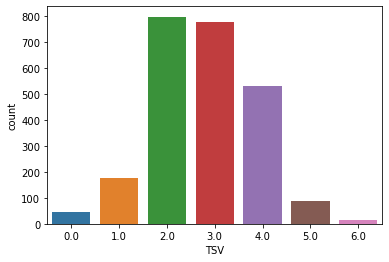

In [7]:
sns.countplot(x='TSV', data=data, order=data.TSV.unique().sort())

In [8]:
all_feature = data.columns
len(all_feature)

30

In [9]:
"""
Explore data on 3 section
1. Full Data --> all of parameter in dataset
2. Main Data --> only 6 parameter (ASHRAE-55)
3. Others Data --> exclude main parameter
"""
main_feature = ["Ti", "RH", "Tmr", "Va", "met", "clo"]
target_label = ["TSV"]
others_feature = [x for x in all_feature if x not in (main_feature + target_label)]


In [10]:
full_data = data[main_feature + others_feature + target_label]
main_data = data[main_feature + target_label]
others_data = data[others_feature + target_label]

# Data Exploration

## Correlation Full_data

<AxesSubplot:>

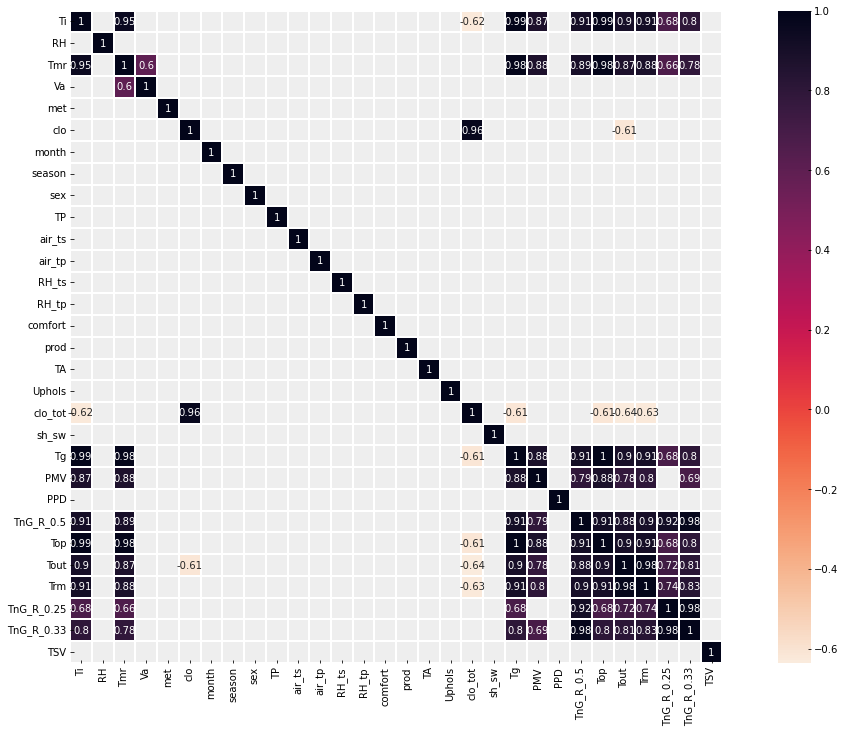

In [11]:
corr = full_data.corr()

plt.style.use('bmh')
plt.figure(figsize=(20,12))
sns.heatmap(corr[(corr >= 0.6) | (corr <= -0.6)], annot=True, 
            cmap='rocket_r', linewidths=0.1, square=True)

In [12]:
corr_target = full_data.corr()['TSV']
relevant_features = corr_target[abs(corr_target) >= 0.3]
relevant_features

Ti            0.336710
Tmr           0.353391
TP            0.489386
sh_sw         0.304330
Tg            0.348942
PMV           0.338905
Top           0.349318
TnG_R_0.25   -0.448108
TSV           1.000000
Name: TSV, dtype: float64

## Correlation main_data

<AxesSubplot:>

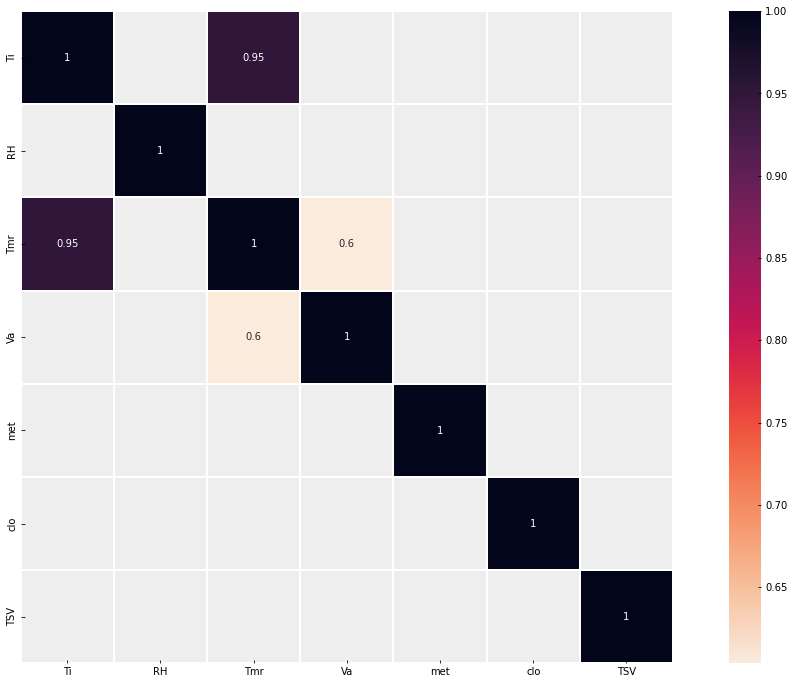

In [13]:
corr = main_data.corr()

plt.style.use('bmh')
plt.figure(figsize=(20,12))
sns.heatmap(corr[(corr >= 0.6) | (corr <= -0.6)], annot=True, 
            cmap='rocket_r', linewidths=0.1, square=True)

In [14]:
corr_target = main_data.corr()['TSV']
relevant_features = corr_target[abs(corr_target) >= 0.3]
relevant_features

Ti     0.336710
Tmr    0.353391
TSV    1.000000
Name: TSV, dtype: float64

## Correlation others_data

<AxesSubplot:>

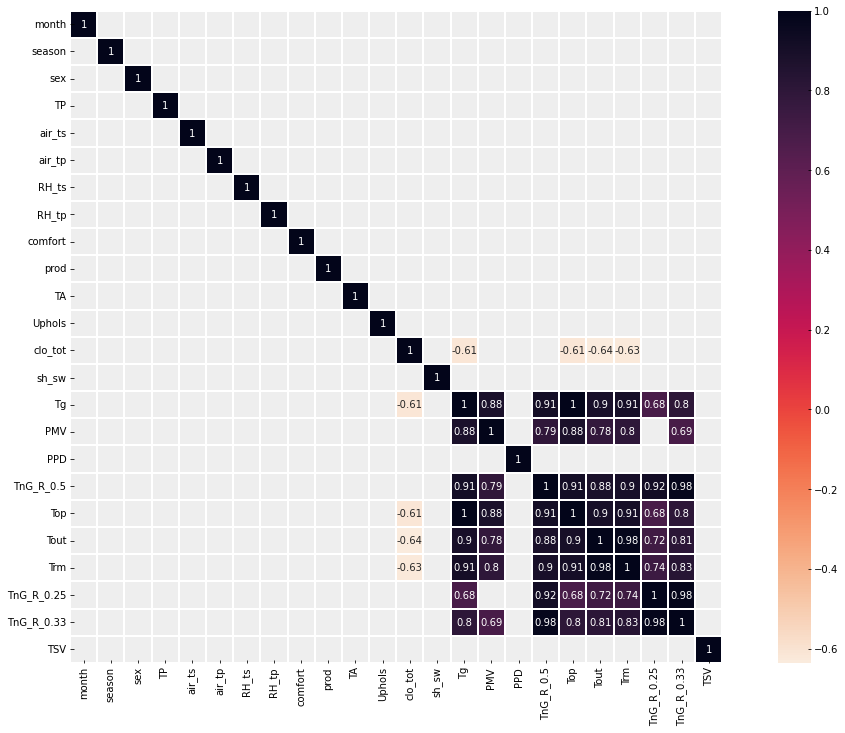

In [15]:
corr = others_data.corr()

plt.style.use('bmh')
plt.figure(figsize=(20,12))
sns.heatmap(corr[(corr >= 0.6) | (corr <= -0.6)], annot=True, 
            cmap='rocket_r', linewidths=0.1, square=True)

In [16]:
corr_target = others_data.corr()['TSV']
relevant_features = corr_target[abs(corr_target) >= 0.3]
relevant_features

TP            0.489386
sh_sw         0.304330
Tg            0.348942
PMV           0.338905
Top           0.349318
TnG_R_0.25   -0.448108
TSV           1.000000
Name: TSV, dtype: float64

# Modeling

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.inspection import permutation_importance

from datetime import datetime as dt
import time

In [18]:
scaler = StandardScaler()

#Full data
y_full = full_data[['TSV']].values.ravel()
X_full = full_data.drop(['TSV'], axis=1)

full_features = X_full.columns
X_full = pd.DataFrame(scaler.fit_transform(X_full),columns = full_features)

#Main data
y_main = main_data[['TSV']].values.ravel()
X_main = main_data.drop(['TSV'], axis=1)

main_features = X_main.columns
X_main = pd.DataFrame(scaler.fit_transform(X_main),columns = main_features)


#Others data
y_others = others_data[['TSV']].values.ravel()
X_others = others_data.drop(['TSV'], axis=1)

others_features = X_others.columns
X_others = pd.DataFrame(scaler.fit_transform(X_others),columns = others_features)

# Splitting

In [19]:
X_full_train, X_full_test, y_full_train, y_full_test = train_test_split(X_full, y_full, test_size=0.3, random_state=42)

print(X_full_train.shape, X_full_test.shape)
print(y_full_train.shape, y_full_test.shape)

(1703, 29) (731, 29)
(1703,) (731,)


In [20]:
X_main_train, X_main_test, y_main_train, y_main_test = train_test_split(X_main, y_main, test_size=0.3, random_state=42)

print(X_main_train.shape, X_main_test.shape)
print(y_main_train.shape, y_main_test.shape)

(1703, 6) (731, 6)
(1703,) (731,)


In [21]:
X_others_train, X_others_test, y_others_train, y_others_test = train_test_split(X_others, y_others, test_size=0.3, random_state=42)

print(X_others_train.shape, X_others_test.shape)
print(y_others_train.shape, y_others_test.shape)

(1703, 23) (731, 23)
(1703,) (731,)


In [22]:
def peformance_report(X_train, y_train, X_test, y_test, model):
    
    # training model
    print("Training model ")
    
    start_time = time.time()
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    trainAccuracy = accuracy_score(y_train, y_pred)
    training_secs = (time.time() - start_time)
    
    print(f"  Training time : {training_secs} seconds")
    print(f"  Training accuracy : {trainAccuracy}\n")
    
    # testing model
    print("Testing model ")
    
    start_time = time.time()
    clf = model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    testAccuracy = accuracy_score(y_test, y_pred)
    testing_secs = (time.time() - start_time)
    
    print(f"  Testing time : {testing_secs} seconds")
    print(f"  Testing accuracy : {testAccuracy}\n")
    
    # error
    error_mse = mean_squared_error(y_test, y_pred)
    error_mae = mean_absolute_error(y_test, y_pred)
    error_mape= mean_absolute_percentage_error(y_test, y_pred)   
    
    print(f"  MSE   : {error_mse}")
    print(f"  MAE   : {error_mae}")
    print(f"  MAPE  : {error_mape}")
          
    # report
    testReport = classification_report(y_test, y_pred)
    print(f"\nReport :\n{testReport}")
    
    return clf, y_pred
    
def confusion(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    fig, ax = plt.subplots(figsize=(5,4), dpi=100)
    # sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
    sns.heatmap(cm, cmap ='Blues', annot =True, fmt='g')

    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
    # ax.set_xticklabels(labels=[-3,-2,-1,0,1,2,3])
    # ax.set_yticklabels(labels=[-3,-2,-1,0,1,2,3], rotation=0)
    ax.set_xticklabels(labels=["Cold", "Cool", "Slighty cool", "Neutral", "Slighty warm", "Warm", "Hot"], size=8, rotation=45)
    ax.set_yticklabels(labels=["Cold", "Cool", "Slighty cool", "Neutral", "Slighty warm", "Warm", "Hot"], size=8, rotation=0)

    
def importance(clf, features_name):
    fig, ax = plt.subplots(figsize=(16,12))
    # plot = sns.barplot(x=clf.feature_importances_, y=X_train.columns)
    results = pd.DataFrame({'Features': features_name,
                            'Importances': clf.feature_importances_})
    results.sort_values(by='Importances', inplace=True)
    ax = plt.barh(results['Features'], results['Importances'])
    # plt.xlabel('Importance percentages')
    # ax.set_title('Feature Importance')
    # plot.set_xticklabels(plot.get_xticklabels(),rotation='vertical')
    plt.show()
    return results
  

# XGBoost Classifier

In [23]:
from xgboost import XGBClassifier

In [24]:
model_xgb = XGBClassifier()

## XGBoost full_data

In [25]:
clf_xgb_full, y_full_pred = peformance_report(X_full_train, y_full_train, X_full_test, y_full_test, model_xgb)

Training model 
  Training time : 2.30794095993042 seconds
  Training accuracy : 1.0

Testing model 
  Testing time : 2.0465197563171387 seconds
  Testing accuracy : 0.9712722298221614

  MSE   : 0.036935704514363885
  MAE   : 0.03146374829001368
  MAPE  : 24643500012971.26

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        14
         1.0       0.95      0.90      0.92        60
         2.0       0.97      1.00      0.98       233
         3.0       1.00      0.99      0.99       223
         4.0       0.96      1.00      0.98       165
         5.0       0.93      0.79      0.85        33
         6.0       0.33      0.33      0.33         3

    accuracy                           0.97       731
   macro avg       0.88      0.83      0.85       731
weighted avg       0.97      0.97      0.97       731



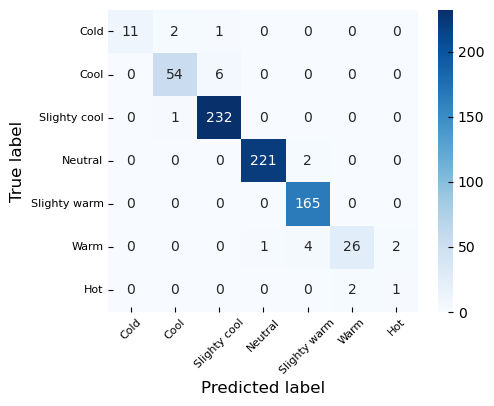

In [26]:
confusion(y_full_test, y_full_pred)

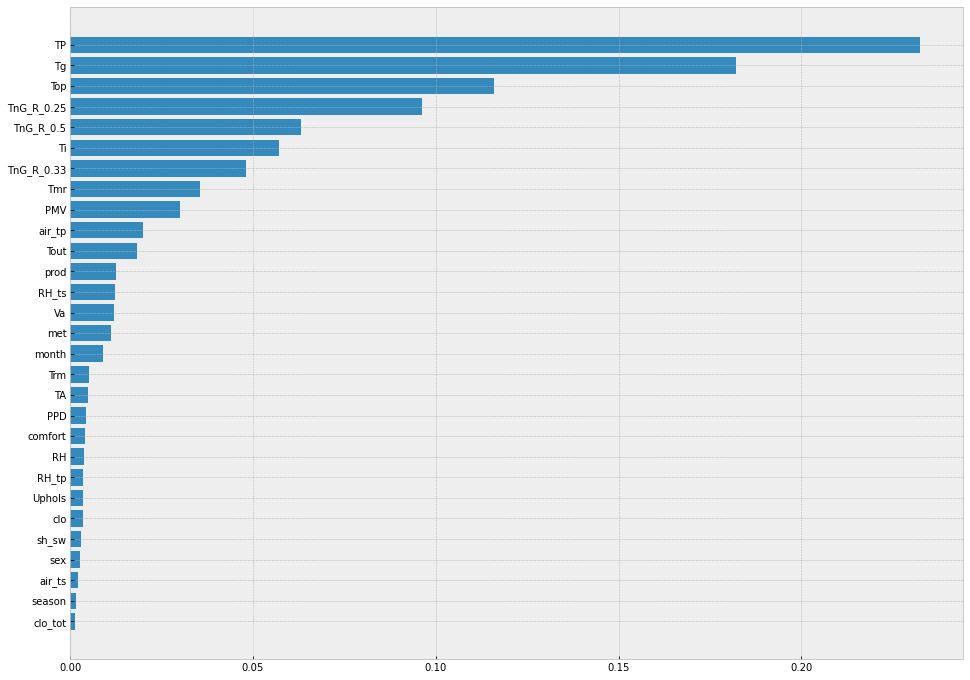

Features  Importances
18     clo_tot     0.001444
7       season     0.001677
10      air_ts     0.002188
8          sex     0.002632
19       sh_sw     0.002869
5          clo     0.003420
17      Uphols     0.003456
13       RH_tp     0.003598
1           RH     0.003897
14     comfort     0.004208
22         PPD     0.004225
16          TA     0.004977
26         Trm     0.005279
6        month     0.009081
4          met     0.011270
3           Va     0.012074
12       RH_ts     0.012271
15        prod     0.012564
25        Tout     0.018180
11      air_tp     0.019894
21         PMV     0.030114
2          Tmr     0.035466
28  TnG_R_0.33     0.048225
0           Ti     0.057097
23   TnG_R_0.5     0.063160
27  TnG_R_0.25     0.096370
24         Top     0.115805
20          Tg     0.182007
9           TP     0.232549

In [27]:
importance_full = importance(clf_xgb_full, full_features)
importance_full

## XGBoost main_data

In [28]:
clf_xgb_main, y_main_pred = peformance_report(X_main_train, y_main_train, X_main_test, y_main_test, model_xgb)

Training model 
  Training time : 1.0837359428405762 seconds
  Training accuracy : 0.9706400469759249

Testing model 
  Testing time : 1.2115845680236816 seconds
  Testing accuracy : 0.48700410396716826

  MSE   : 1.1176470588235294
  MAE   : 0.6935704514363885
  MAPE  : 129378375068099.34

Report :
              precision    recall  f1-score   support

         0.0       0.44      0.29      0.35        14
         1.0       0.38      0.22      0.28        60
         2.0       0.51      0.57      0.54       233
         3.0       0.47      0.55      0.51       223
         4.0       0.52      0.48      0.50       165
         5.0       0.30      0.09      0.14        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.49       731
   macro avg       0.38      0.31      0.33       731
weighted avg       0.48      0.49      0.48       731



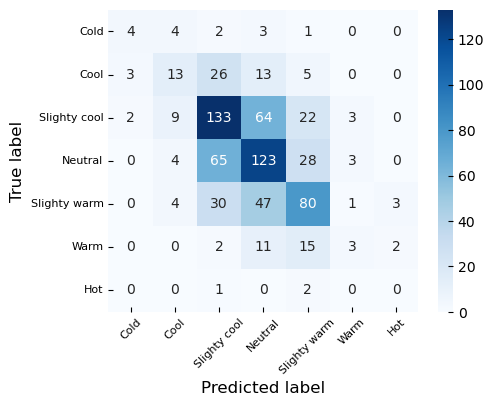

In [29]:
confusion(y_main_test, y_main_pred)

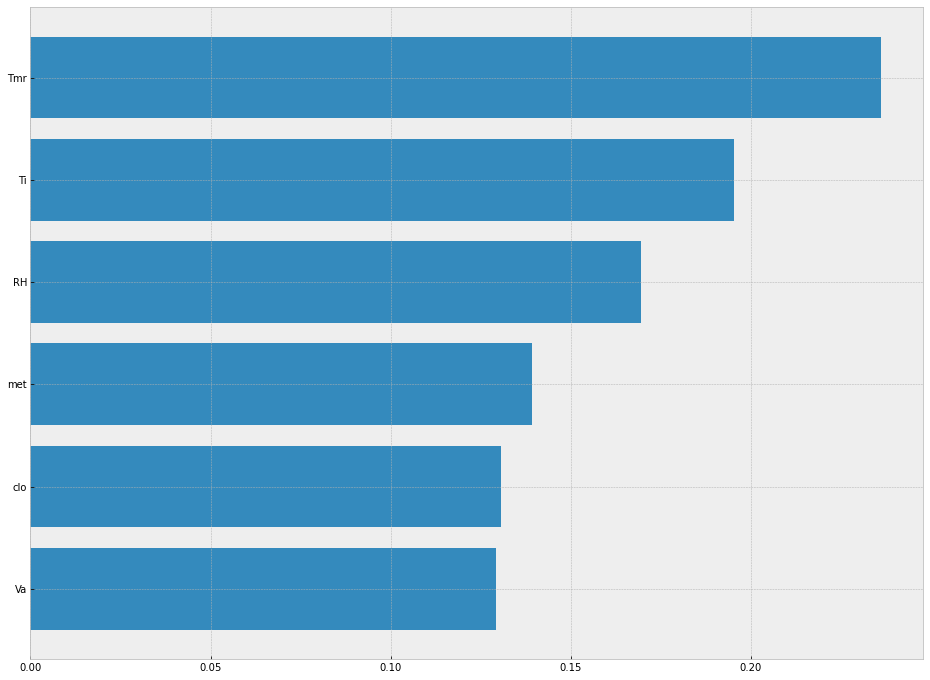

Features  Importances
3       Va     0.129236
5      clo     0.130557
4      met     0.139190
1       RH     0.169432
0       Ti     0.195470
2      Tmr     0.236116

In [30]:
importance_main = importance(clf_xgb_main, main_features)
importance_main

## XGBoost others_data

In [31]:
clf_xgb_others, y_others_pred = peformance_report(X_others_train, y_others_train, X_others_test, y_others_test, model_xgb)

Training model 
  Training time : 1.6942451000213623 seconds
  Training accuracy : 1.0

Testing model 
  Testing time : 2.177305221557617 seconds
  Testing accuracy : 0.9699042407660738

  MSE   : 0.03419972640218878
  MAE   : 0.03146374829001368
  MAPE  : 18482625009728.45

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        14
         1.0       0.93      0.90      0.92        60
         2.0       0.97      1.00      0.98       233
         3.0       0.99      0.99      0.99       223
         4.0       0.96      0.99      0.98       165
         5.0       0.93      0.82      0.87        33
         6.0       0.50      0.33      0.40         3

    accuracy                           0.97       731
   macro avg       0.90      0.83      0.86       731
weighted avg       0.97      0.97      0.97       731



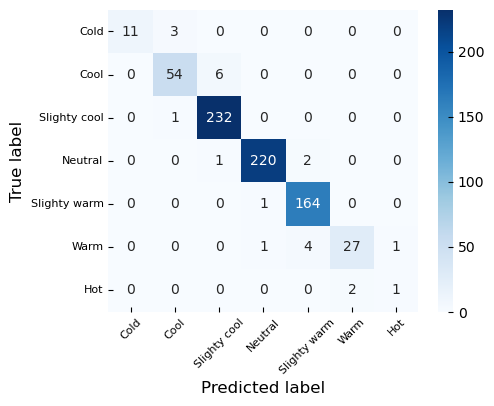

In [32]:
confusion(y_others_test, y_others_pred)

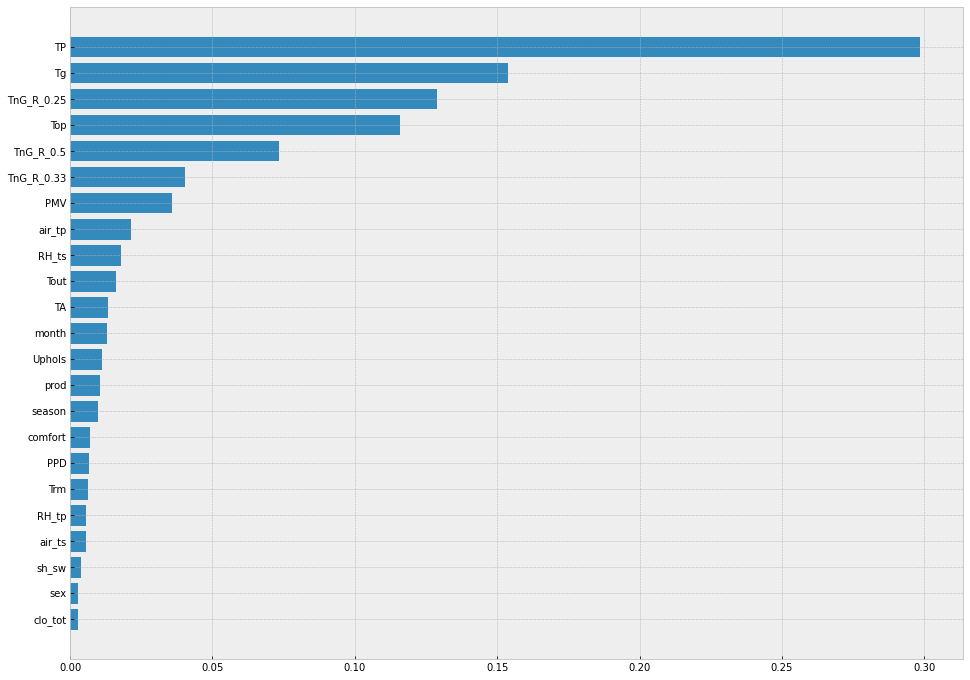

Features  Importances
12     clo_tot     0.002637
2          sex     0.002763
13       sh_sw     0.003824
4       air_ts     0.005567
7        RH_tp     0.005665
20         Trm     0.006142
16         PPD     0.006566
8      comfort     0.007067
1       season     0.009634
9         prod     0.010680
11      Uphols     0.011121
0        month     0.012949
10          TA     0.013311
19        Tout     0.016101
6        RH_ts     0.017895
5       air_tp     0.021258
15         PMV     0.035748
22  TnG_R_0.33     0.040280
17   TnG_R_0.5     0.073524
18         Top     0.115726
21  TnG_R_0.25     0.128983
14          Tg     0.153957
3           TP     0.298604

In [33]:
importance_others = importance(clf_xgb_others, others_features)
importance_others

## XGBoost Importance

In [34]:
importance_feature = importance_full.sort_values(by=['Importances'], ascending=False)
importance_feature = importance_feature.iloc[:20]
# result
importance_features = importance_feature['Features'].tolist()
print(importance_features)
len(importance_features)

['TP', 'Tg', 'Top', 'TnG_R_0.25', 'TnG_R_0.5', 'Ti', 'TnG_R_0.33', 'Tmr', 'PMV', 'air_tp', 'Tout', 'prod', 'RH_ts', 'Va', 'met', 'month', 'Trm', 'TA', 'PPD', 'comfort']


20

In [36]:
#Selected data
y_importance = full_data[['TSV']].values.ravel()
X_importance = full_data[importance_features]

# full_features = X_full.columns
X_important = pd.DataFrame(scaler.fit_transform(X_importance),columns = importance_features)


X_important_train, X_important_test, y_important_train, y_important_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

print(X_important_train.shape, X_important_test.shape)
print(y_important_train.shape, y_important_test.shape)

(1703, 20) (731, 20)
(1703,) (731,)


In [37]:
clf_xgb_important, y_important_pred = peformance_report(X_important_train, y_important_train, X_important_test, y_important_test, model_xgb)

Training model 
  Training time : 1.6615533828735352 seconds
  Training accuracy : 1.0

Testing model 
  Testing time : 1.4838941097259521 seconds
  Testing accuracy : 0.9753761969904241

  MSE   : 0.024623803009575923
  MAE   : 0.024623803009575923
  MAPE  : 18482625009728.45

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        14
         1.0       0.93      0.90      0.92        60
         2.0       0.97      1.00      0.99       233
         3.0       1.00      1.00      1.00       223
         4.0       0.97      1.00      0.99       165
         5.0       0.93      0.85      0.89        33
         6.0       0.50      0.33      0.40         3

    accuracy                           0.98       731
   macro avg       0.90      0.84      0.86       731
weighted avg       0.97      0.98      0.97       731



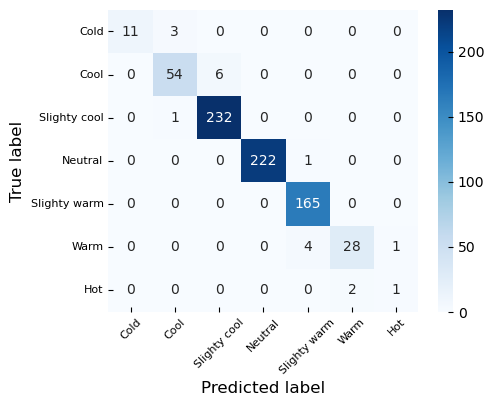

In [38]:
confusion(y_important_test, y_important_pred)

# SVM Classifier

In [39]:
model_svm = SVC()

## SVM full_data

In [40]:
clf_svm_full, y_full_pred = peformance_report(X_full_train, y_full_train, X_full_test, y_full_test, model_svm)

Training model 
  Training time : 0.6986055374145508 seconds
  Training accuracy : 0.9653552554315913

Testing model 
  Testing time : 0.46956586837768555 seconds
  Testing accuracy : 0.9015047879616963

  MSE   : 0.11080711354309165
  MAE   : 0.10259917920656635
  MAPE  : 73930500038913.8

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.14      0.25        14
         1.0       0.75      0.70      0.72        60
         2.0       0.92      0.98      0.95       233
         3.0       0.98      0.99      0.98       223
         4.0       0.82      0.99      0.90       165
         5.0       1.00      0.09      0.17        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.90       731
   macro avg       0.78      0.56      0.57       731
weighted avg       0.91      0.90      0.88       731



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


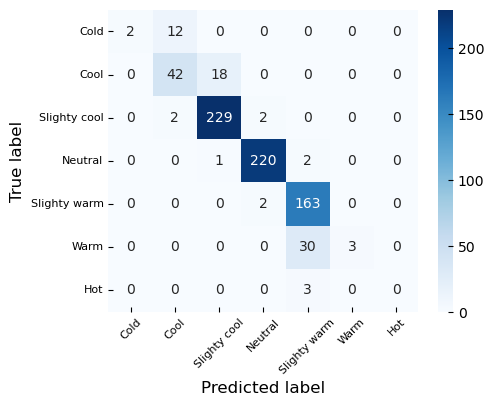

In [41]:
confusion(y_full_test, y_full_pred)

## SVM main_data

In [42]:
clf_svm_main, y_main_pred = peformance_report(X_main_train, y_main_train, X_main_test, y_main_test, model_svm)

Training model 
  Training time : 0.7912335395812988 seconds
  Training accuracy : 0.48150322959483266

Testing model 
  Testing time : 0.538038969039917 seconds
  Testing accuracy : 0.4473324213406293

  MSE   : 1.2175102599179206
  MAE   : 0.7523939808481532
  MAPE  : 215630625113498.72

Report :
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        14
         1.0       0.00      0.00      0.00        60
         2.0       0.46      0.62      0.53       233
         3.0       0.42      0.60      0.50       223
         4.0       0.48      0.30      0.37       165
         5.0       0.00      0.00      0.00        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.45       731
   macro avg       0.19      0.22      0.20       731
weighted avg       0.38      0.45      0.40       731



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


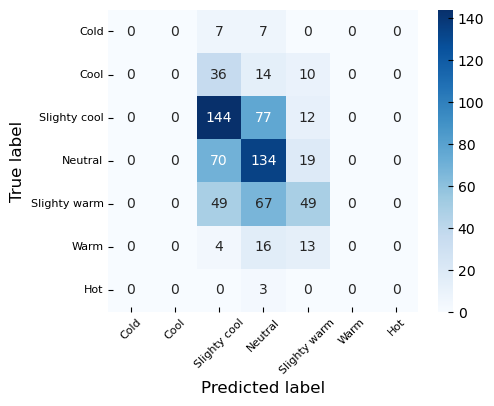

In [43]:
confusion(y_main_test, y_main_pred)

## SVM others_data

In [44]:
clf_svm_others, y_others_pred = peformance_report(X_others_train, y_others_train, X_others_test, y_others_test, model_svm)

Training model 
  Training time : 0.7048008441925049 seconds
  Training accuracy : 0.9618320610687023

Testing model 
  Testing time : 0.522705078125 seconds
  Testing accuracy : 0.8987688098495212

  MSE   : 0.11764705882352941
  MAE   : 0.106703146374829
  MAPE  : 86252250045399.42

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.07      0.13        14
         1.0       0.73      0.62      0.67        60
         2.0       0.90      0.99      0.94       233
         3.0       0.99      0.99      0.99       223
         4.0       0.83      0.99      0.91       165
         5.0       1.00      0.12      0.22        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.90       731
   macro avg       0.78      0.54      0.55       731
weighted avg       0.90      0.90      0.87       731



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


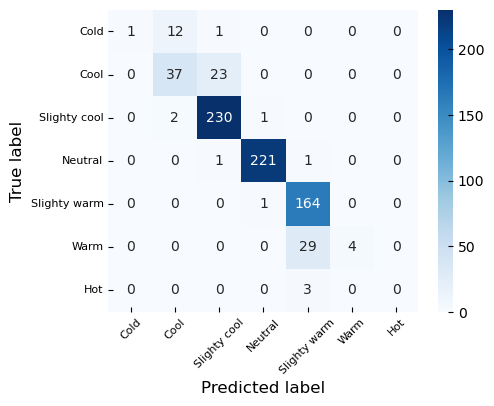

In [45]:
confusion(y_others_test, y_others_pred)

# XGBoost with Hyperparameter Tuning

In [63]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [71]:
# initial value
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

# find the best parammeter
def hyperparam(X_train, y_train, X_test, y_test):
    def objective(space):
        clf=XGBClassifier(
                        n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                        reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                        colsample_bytree=int(space['colsample_bytree']))

        evaluation = [( X_train, y_train), ( X_test, y_test)]

        clf.fit(X_train, y_train,
                eval_set=evaluation, eval_metric="auc",
                early_stopping_rounds=10,verbose=False)


        pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, pred>0.5)
        print ("SCORE:", accuracy)
        return {'loss': -accuracy, 'status': STATUS_OK }
    
    trials = Trials()

    best_hyperparams = fmin(fn = objective,
                            space = space,
                            algo = tpe.suggest,
                            max_evals = 100,
                            trials = trials)
    print("The best hyperparameters are : ","\n")
    print(best_hyperparams)
    return best_hyperparams

## XGBoost Full_data with hyperparameter tuning

In [72]:
full_param = hyperparam(X_full_train, y_full_train, X_full_test, y_full_test)

SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
  1%|▍                                             | 1/100 [00:00<00:21,  4.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:00<00:20,  4.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
  7%|███▏                                          | 7/100 [00:01<00:20,  4.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:01<00:22,  4.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:02<00:20,  4.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:03<00:18,  4.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:04<00:16,  4.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(




0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 21%|█████████▍                                   | 21/100 [00:04<00:17,  4.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:05<00:21,  3.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:05<00:21,  3.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:05<00:19,  3.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:06<00:19,  3.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:06<00:17,  4.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:06<00:17,  4.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:06<00:16,  4.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:07<00:17,  4.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:07<00:16,  4.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:07<00:16,  4.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:08<00:15,  4.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:08<00:15,  4.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:08<00:15,  4.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:08<00:13,  4.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:08<00:12,  4.95trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:09<00:14,  4.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:10<00:14,  3.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:10<00:14,  3.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:11<00:13,  3.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:11<00:12,  4.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:11<00:12,  4.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:12<00:12,  4.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 50%|██████████████████████▌                      | 50/100 [00:12<00:12,  4.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:12<00:12,  3.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:13<00:11,  3.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:13<00:10,  4.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:13<00:10,  4.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:14<00:10,  4.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:14<00:10,  4.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:14<00:09,  4.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:14<00:09,  4.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:14<00:08,  4.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:15<00:08,  4.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 64%|████████████████████████████▊                | 64/100 [00:15<00:08,  4.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:15<00:07,  4.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:16<00:06,  4.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:16<00:06,  4.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:17<00:06,  4.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:17<00:06,  4.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:18<00:07,  3.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:18<00:06,  3.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 76%|██████████████████████████████████▏          | 76/100 [00:18<00:06,  3.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 77%|██████████████████████████████████▋          | 77/100 [00:19<00:07,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:19<00:05,  3.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:19<00:04,  4.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 83%|█████████████████████████████████████▎       | 83/100 [00:20<00:05,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:21<00:04,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:22<00:04,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:22<00:03,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:22<00:02,  3.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:23<00:02,  3.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:23<00:01,  4.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:24<00:01,  4.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:24<00:00,  4.28trial/s, best loss: -0.08207934336525308]

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:24<00:00,  4.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:24<00:00,  4.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:25<00:00,  3.94trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.585084816675222, 'gamma': 3.0609644400133007, 'max_depth': 5.0, 'min_child_weight': 4.0, 'reg_alpha': 171.0, 'reg_lambda': 0.8850978829895682}


In [81]:
model_xgb_full_hyper = XGBClassifier(full_param)

In [82]:
clf_xgb_full_hyper, y_full_pred = peformance_report(X_full_train, y_full_train, X_full_test, y_full_test, model_xgb_full_hyper)

Training model 
  Training time : 1.5172314643859863 seconds
  Training accuracy : 1.0

Testing model 
  Testing time : 1.4011201858520508 seconds
  Testing accuracy : 0.9712722298221614

  MSE   : 0.036935704514363885
  MAE   : 0.03146374829001368
  MAPE  : 24643500012971.26

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        14
         1.0       0.95      0.90      0.92        60
         2.0       0.97      1.00      0.98       233
         3.0       1.00      0.99      0.99       223
         4.0       0.96      1.00      0.98       165
         5.0       0.93      0.79      0.85        33
         6.0       0.33      0.33      0.33         3

    accuracy                           0.97       731
   macro avg       0.88      0.83      0.85       731
weighted avg       0.97      0.97      0.97       731



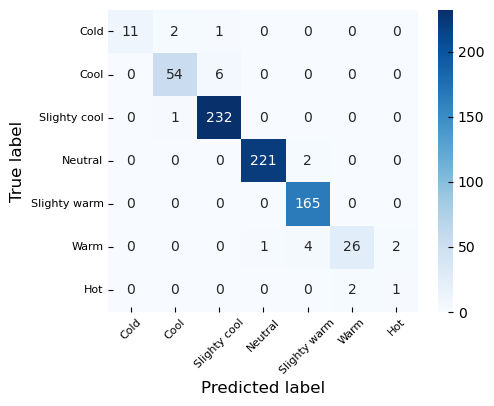

In [83]:
confusion(y_full_test, y_full_pred)

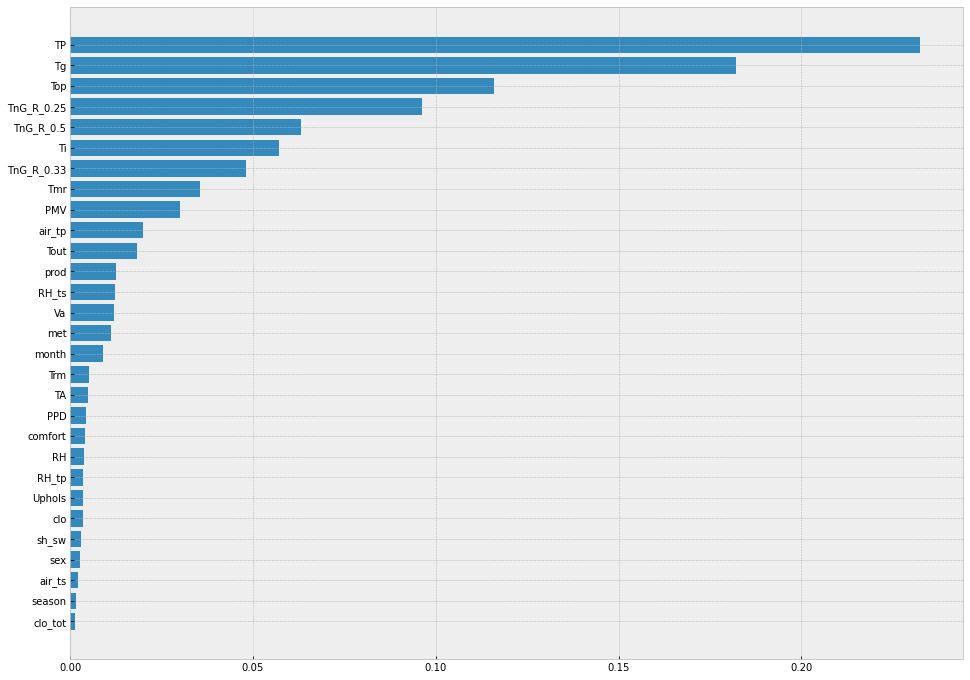

Features  Importances
18     clo_tot     0.001444
7       season     0.001677
10      air_ts     0.002188
8          sex     0.002632
19       sh_sw     0.002869
5          clo     0.003420
17      Uphols     0.003456
13       RH_tp     0.003598
1           RH     0.003897
14     comfort     0.004208
22         PPD     0.004225
16          TA     0.004977
26         Trm     0.005279
6        month     0.009081
4          met     0.011270
3           Va     0.012074
12       RH_ts     0.012271
15        prod     0.012564
25        Tout     0.018180
11      air_tp     0.019894
21         PMV     0.030114
2          Tmr     0.035466
28  TnG_R_0.33     0.048225
0           Ti     0.057097
23   TnG_R_0.5     0.063160
27  TnG_R_0.25     0.096370
24         Top     0.115805
20          Tg     0.182007
9           TP     0.232549

In [84]:
importance_full = importance(clf_xgb_full_hyper, full_features)
importance_full

## XGBoost main_data with hyperparameter tuning

In [77]:
main_param = hyperparam(X_main_train, y_main_train, X_main_test, y_main_test)

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:13,  7.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:17,  5.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:00<00:15,  5.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
  7%|███▏                                          | 7/100 [00:01<00:17,  5.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:01<00:16,  5.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:01<00:18,  4.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:02<00:18,  4.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:02<00:16,  5.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:03<00:15,  5.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:03<00:15,  5.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:03<00:14,  5.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:03<00:12,  6.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:04<00:13,  5.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:04<00:15,  4.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:05<00:15,  4.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:05<00:14,  4.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:05<00:14,  5.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:06<00:14,  4.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:06<00:12,  5.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:06<00:15,  4.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:06<00:11,  5.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:07<00:11,  5.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:07<00:10,  5.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:08<00:09,  5.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:08<00:10,  5.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:08<00:10,  5.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:08<00:11,  4.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:09<00:08,  5.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:09<00:11,  4.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:10<00:13,  3.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:10<00:12,  3.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:10<00:10,  4.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:11<00:10,  4.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:12<00:09,  4.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:12<00:08,  4.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:12<00:09,  3.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:13<00:07,  4.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:13<00:06,  5.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:13<00:05,  5.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:14<00:06,  4.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:14<00:06,  4.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:15<00:06,  4.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:15<00:04,  5.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:15<00:04,  5.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:16<00:04,  4.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:16<00:04,  4.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:16<00:05,  3.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:17<00:04,  3.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:18<00:03,  3.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:18<00:02,  4.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:19<00:02,  4.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:19<00:01,  4.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:20<00:01,  4.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:20<00:00,  4.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:20<00:00,  4.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:20<00:00,  4.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:21<00:00,  4.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:21<00:00,  4.68trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.7163580641592272, 'gamma': 7.845151938193131, 'max_depth': 9.0, 'min_child_weight': 10.0, 'reg_alpha': 80.0, 'reg_lambda': 0.5849619075986845}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



In [85]:
model_xgb_main_hyper = XGBClassifier(main_param)
clf_xgb_main_hyper, y_main_pred = peformance_report(X_main_train, y_main_train, X_main_test, y_main_test, model_xgb_main_hyper)

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


Training model 
  Training time : 0.8151614665985107 seconds
  Training accuracy : 0.9706400469759249

Testing model 
  Testing time : 0.8613615036010742 seconds
  Testing accuracy : 0.48700410396716826

  MSE   : 1.1176470588235294
  MAE   : 0.6935704514363885
  MAPE  : 129378375068099.34

Report :
              precision    recall  f1-score   support

         0.0       0.44      0.29      0.35        14
         1.0       0.38      0.22      0.28        60
         2.0       0.51      0.57      0.54       233
         3.0       0.47      0.55      0.51       223
         4.0       0.52      0.48      0.50       165
         5.0       0.30      0.09      0.14        33
         6.0       0.00      0.00      0.00         3

    accuracy                           0.49       731
   macro avg       0.38      0.31      0.33       731
weighted avg       0.48      0.49      0.48       731



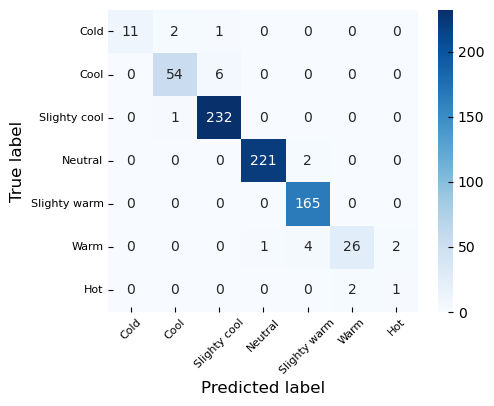

In [86]:
confusion(y_full_test, y_full_pred)

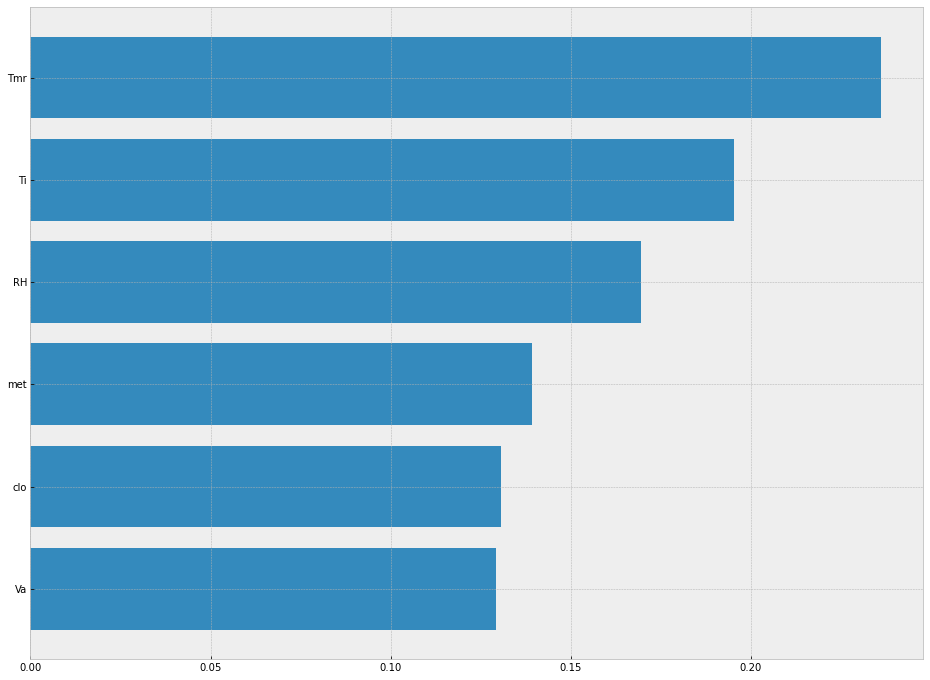

Features  Importances
3       Va     0.129236
5      clo     0.130557
4      met     0.139190
1       RH     0.169432
0       Ti     0.195470
2      Tmr     0.236116

In [87]:
importance_main = importance(clf_xgb_main_hyper, main_features)
importance_main

## XGBoost others_data with hyperparameter tuning

In [88]:
others_param = hyperparam(X_others_train, y_others_train, X_others_test, y_others_test)

  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
  3%|█▍                                            | 3/100 [00:00<00:27,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:27,  3.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:28,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:28,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:29,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:31,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:27,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 12%|█████▍                                       | 12/100 [00:03<00:25,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:35,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:05<00:39,  2.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:28,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:05<00:22,  3.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:06<00:24,  3.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 20%|█████████                                    | 20/100 [00:06<00:21,  3.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:06<00:21,  3.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:07<00:23,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:07<00:24,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:07<00:23,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:08<00:27,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:08<00:30,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:09<00:31,  2.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:09<00:29,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:09<00:29,  2.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:10<00:28,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:10<00:28,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:11<00:27,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:11<00:25,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:11<00:23,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:12<00:21,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:12<00:21,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:12<00:16,  3.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:13<00:18,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:13<00:19,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 41%|██████████████████▍                          | 41/100 [00:14<00:19,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:14<00:17,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:14<00:15,  3.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:15<00:17,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:15<00:18,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 47%|█████████████████████▏                       | 47/100 [00:16<00:18,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:16<00:16,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:16<00:15,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:17<00:16,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:17<00:17,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:18<00:18,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:18<00:16,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:18<00:17,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:19<00:15,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:19<00:14,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:19<00:14,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:20<00:15,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:20<00:15,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:21<00:13,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:21<00:12,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:21<00:12,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 65%|█████████████████████████████▎               | 65/100 [00:22<00:13,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:22<00:11,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:23<00:09,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:23<00:09,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:23<00:09,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 70%|███████████████████████████████▍             | 70/100 [00:23<00:08,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:24<00:08,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 73%|████████████████████████████████▊            | 73/100 [00:24<00:07,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:25<00:08,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:25<00:09,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:26<00:08,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:26<00:07,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 78%|███████████████████████████████████          | 78/100 [00:26<00:06,  3.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:27<00:07,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 81%|████████████████████████████████████▍        | 81/100 [00:27<00:05,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:27<00:05,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:28<00:06,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:29<00:03,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 89%|████████████████████████████████████████     | 89/100 [00:30<00:03,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:30<00:03,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:30<00:03,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 93%|█████████████████████████████████████████▊   | 93/100 [00:31<00:02,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:32<00:01,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 96%|███████████████████████████████████████████▏ | 96/100 [00:32<00:01,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:33<00:00,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:33<00:00,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:34<00:00,  2.93trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.542121153860698, 'gamma': 5.465775116244733, 'max_depth': 16.0, 'min_child_weight': 7.0, 'reg_alpha': 75.0, 'reg_lambda': 0.5666237797241254}


In [90]:
model_xgb_others_hyper = XGBClassifier(others_param)
clf_xgb_others_hyper, y_others_pred = peformance_report(X_others_train, y_others_train, X_others_test, y_others_test, model_xgb_others_hyper)

Training model 
  Training time : 1.2747414112091064 seconds
  Training accuracy : 1.0

Testing model 
  Testing time : 1.47281813621521 seconds
  Testing accuracy : 0.9699042407660738

  MSE   : 0.03419972640218878
  MAE   : 0.03146374829001368
  MAPE  : 18482625009728.45

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        14
         1.0       0.93      0.90      0.92        60
         2.0       0.97      1.00      0.98       233
         3.0       0.99      0.99      0.99       223
         4.0       0.96      0.99      0.98       165
         5.0       0.93      0.82      0.87        33
         6.0       0.50      0.33      0.40         3

    accuracy                           0.97       731
   macro avg       0.90      0.83      0.86       731
weighted avg       0.97      0.97      0.97       731



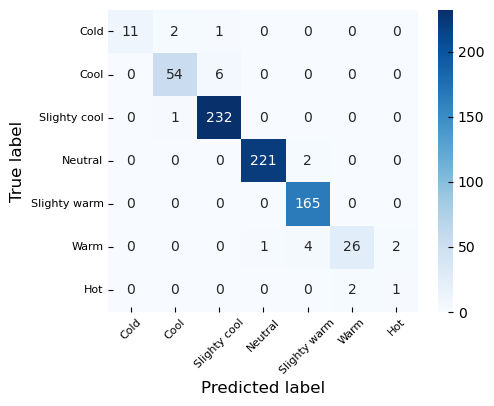

In [91]:
confusion(y_full_test, y_full_pred)

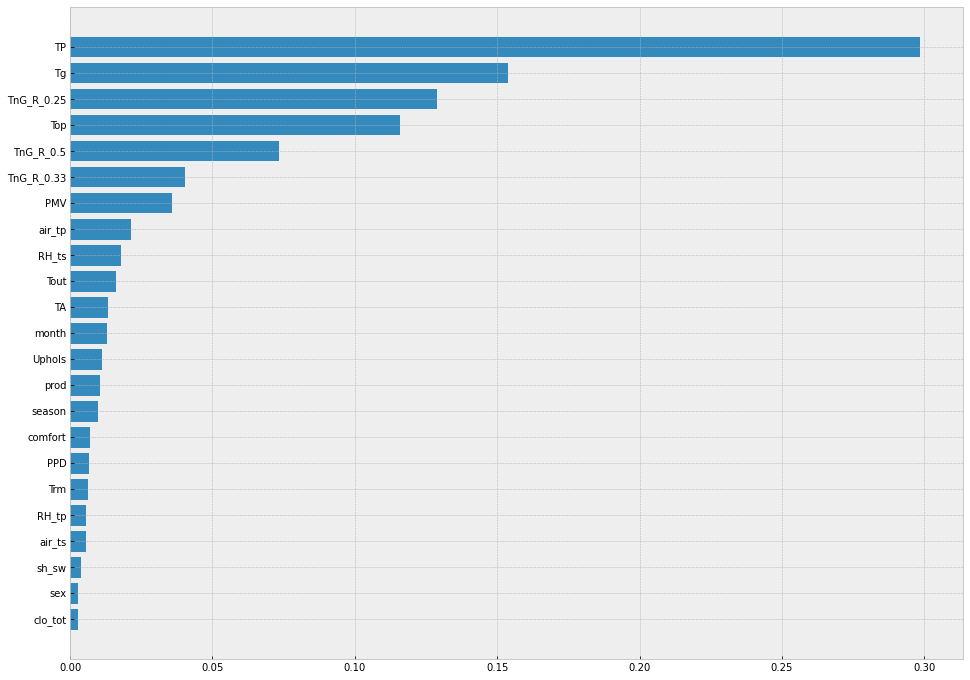

Features  Importances
12     clo_tot     0.002637
2          sex     0.002763
13       sh_sw     0.003824
4       air_ts     0.005567
7        RH_tp     0.005665
20         Trm     0.006142
16         PPD     0.006566
8      comfort     0.007067
1       season     0.009634
9         prod     0.010680
11      Uphols     0.011121
0        month     0.012949
10          TA     0.013311
19        Tout     0.016101
6        RH_ts     0.017895
5       air_tp     0.021258
15         PMV     0.035748
22  TnG_R_0.33     0.040280
17   TnG_R_0.5     0.073524
18         Top     0.115726
21  TnG_R_0.25     0.128983
14          Tg     0.153957
3           TP     0.298604

In [92]:
importance_others = importance(clf_xgb_others_hyper, others_features)
importance_others

## XGBoost importance feature with hyperparameter tuning

In [93]:
importance_feature = importance_full.sort_values(by=['Importances'], ascending=False)
importance_feature = importance_feature.iloc[:20]
# result
importance_features = importance_feature['Features'].tolist()
print(importance_features)
len(importance_features)

['TP', 'Tg', 'Top', 'TnG_R_0.25', 'TnG_R_0.5', 'Ti', 'TnG_R_0.33', 'Tmr', 'PMV', 'air_tp', 'Tout', 'prod', 'RH_ts', 'Va', 'met', 'month', 'Trm', 'TA', 'PPD', 'comfort']


20

In [94]:
#Selected data
y_importance = full_data[['TSV']].values.ravel()
X_importance = full_data[importance_features]

# full_features = X_full.columns
X_important = pd.DataFrame(scaler.fit_transform(X_importance),columns = importance_features)


X_important_train, X_important_test, y_important_train, y_important_test = train_test_split(X_importance, y_importance, test_size=0.3, random_state=42)

print(X_important_train.shape, X_important_test.shape)
print(y_important_train.shape, y_important_test.shape)

(1703, 20) (731, 20)
(1703,) (731,)


In [95]:
important_param = hyperparam(X_important_train, y_important_train, X_important_test, y_important_test)

  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
  2%|▉                                             | 2/100 [00:00<00:28,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:01<00:36,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:35,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:31,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:02<00:33,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:35,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:34,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 10%|████▌                                        | 10/100 [00:03<00:28,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:32,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:04<00:31,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
 15%|██████▊                                      | 15/100 [00:05<00:23,  3.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:05<00:20,  4.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 18%|████████                                     | 18/100 [00:06<00:28,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 20%|█████████                                    | 20/100 [00:06<00:22,  3.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:07<00:25,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:07<00:25,  3.07trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 23%|██████████▎                                  | 23/100 [00:07<00:23,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:08<00:23,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:08<00:26,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:09<00:28,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:09<00:29,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:10<00:31,  2.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:10<00:26,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:11<00:20,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:11<00:21,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:12<00:25,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:12<00:26,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:13<00:28,  2.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 39%|█████████████████▌                           | 39/100 [00:13<00:24,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:14<00:23,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:14<00:23,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:15<00:27,  2.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:15<00:24,  2.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:16<00:23,  2.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:16<00:17,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:17<00:15,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:17<00:13,  3.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 53%|███████████████████████▊                     | 53/100 [00:18<00:12,  3.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:18<00:12,  3.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:19<00:13,  3.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:19<00:14,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:19<00:16,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:20<00:17,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:20<00:18,  2.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:21<00:20,  1.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:22<00:18,  2.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:22<00:14,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:22<00:12,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:23<00:10,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:24<00:09,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 70%|███████████████████████████████▍             | 70/100 [00:24<00:09,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:25<00:08,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 72%|████████████████████████████████▍            | 72/100 [00:25<00:08,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:25<00:07,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:26<00:07,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 78%|███████████████████████████████████          | 78/100 [00:27<00:06,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:27<00:06,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:27<00:06,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:28<00:05,  3.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:28<00:05,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:29<00:06,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 85%|██████████████████████████████████████▎      | 85/100 [00:30<00:06,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:30<00:05,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:30<00:05,  2.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:30<00:04,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:31<00:04,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:31<00:03,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:32<00:03,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:32<00:02,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:33<00:02,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 95%|██████████████████████████████████████████▊  | 95/100 [00:33<00:01,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:33<00:01,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:34<00:01,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:34<00:00,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:35<00:00,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



100%|████████████████████████████████████████████| 100/100 [00:35<00:00,  2.85trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.7397277174593374, 'gamma': 1.6325285285515658, 'max_depth': 16.0, 'min_child_weight': 7.0, 'reg_alpha': 75.0, 'reg_lambda': 0.24524338576589366}


In [96]:
model_xgb_important_hyper = XGBClassifier(important_param)
clf_xgb_important_hyper, y_important_pred = peformance_report(X_important_train, y_important_train, X_important_test, y_important_test, model_xgb_important_hyper)

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


Training model 
  Training time : 1.4184460639953613 seconds
  Training accuracy : 1.0

Testing model 
  Testing time : 2.438037395477295 seconds
  Testing accuracy : 0.9753761969904241

  MSE   : 0.024623803009575923
  MAE   : 0.024623803009575923
  MAPE  : 18482625009728.45

Report :
              precision    recall  f1-score   support

         0.0       1.00      0.79      0.88        14
         1.0       0.93      0.90      0.92        60
         2.0       0.97      1.00      0.99       233
         3.0       1.00      1.00      1.00       223
         4.0       0.97      1.00      0.99       165
         5.0       0.93      0.85      0.89        33
         6.0       0.50      0.33      0.40         3

    accuracy                           0.98       731
   macro avg       0.90      0.84      0.86       731
weighted avg       0.97      0.98      0.97       731



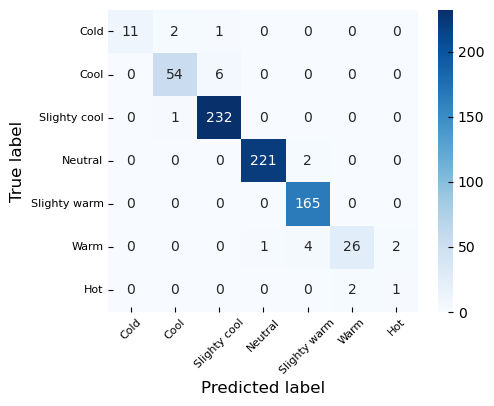

In [97]:
confusion(y_full_test, y_full_pred)

# Compare

In [98]:
importance_feature = importance_full.sort_values(by=['Importances'], ascending=False)
# importance_feature = importance_feature.iloc[:20]
# result
importance_features = importance_feature['Features'].tolist()
print(importance_features)
len(importance_features)

['TP', 'Tg', 'Top', 'TnG_R_0.25', 'TnG_R_0.5', 'Ti', 'TnG_R_0.33', 'Tmr', 'PMV', 'air_tp', 'Tout', 'prod', 'RH_ts', 'Va', 'met', 'month', 'Trm', 'TA', 'PPD', 'comfort', 'RH', 'RH_tp', 'Uphols', 'clo', 'sh_sw', 'sex', 'air_ts', 'season', 'clo_tot']


29

In [117]:
featureNum = []

# XGBoost data
trainAcc_xgb = []
testAcc_xgb = []
MSE_xgb = []
MAE_xgb = []
MAPE_xgb = []

# SVM data
trainAcc_svm = []
testAcc_svm = []
MSE_svm = []
MAE_svm = []
MAPE_svm = []

# XGBoost with parameter tuning data
trainAcc_xgb_hyp = []
testAcc_xgb_hyp = []
MSE_xgb_hyp = []
MAE_xgb_hyp = []
MAPE_xgb_hyp = []


model_xgb = XGBClassifier()
model_svm = SVC()

for i in range(len(importance_features)):
    featureNum.append(i + 1)
    y = data[['TSV']].values.ravel()
    x = data[importance_features[0:i + 1]]
    
    X_important = pd.DataFrame(scaler.fit_transform(x),columns = importance_features[0:i+1])
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)  
    
    # Xgboost
    clf = model_xgb.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    trainAcc_xgb.append(accuracy_score(y_train, y_pred))
    
    clf = model_xgb.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    testAcc_xgb.append(accuracy_score(y_test, y_pred))
    
    MSE_xgb.append(mean_squared_error(y_test, y_pred))
    MAE_xgb.append(mean_absolute_error(y_test, y_pred))
    MAPE_xgb.append(mean_absolute_percentage_error(y_test, y_pred))
    
    # SVM
    clf = model_svm.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    trainAcc_svm.append(accuracy_score(y_train, y_pred))
    
    clf = model_svm.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    testAcc_svm.append(accuracy_score(y_test, y_pred))
    
    MSE_svm.append(mean_squared_error(y_test, y_pred))
    MAE_svm.append(mean_absolute_error(y_test, y_pred))
    MAPE_svm.append(mean_absolute_percentage_error(y_test, y_pred))
    
    # XGBoost with parameter tuning
    param = hyperparam(X_train, y_train, X_test, y_test)
    
    model_xgb_hyp = XGBClassifier(param)
    
    clf = model_xgb_hyp.fit(X_train, y_train)
    y_pred = clf.predict(X_train)
    trainAcc_xgb_hyp.append(accuracy_score(y_train, y_pred))
    
    clf = model_xgb_hyp.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    testAcc_xgb_hyp.append(accuracy_score(y_test, y_pred))
    
    MSE_xgb_hyp.append(mean_squared_error(y_test, y_pred))
    MAE_xgb_hyp.append(mean_absolute_error(y_test, y_pred))
    MAPE_xgb_hyp.append(mean_absolute_percentage_error(y_test, y_pred))
    

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:13,  7.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:14,  6.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:00<00:16,  5.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:24,  3.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:01<00:21,  4.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:01<00:17,  5.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:02<00:14,  6.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:02<00:12,  7.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:02<00:13,  6.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:03<00:15,  5.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:03<00:15,  5.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 19%|████████▌                                    | 19/100 [00:03<00:15,  5.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:04<00:18,  4.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:04<00:17,  4.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:04<00:15,  4.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:05<00:16,  4.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:05<00:14,  5.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:05<00:12,  5.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:06<00:12,  5.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:06<00:12,  5.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:06<00:12,  5.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:06<00:11,  5.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:07<00:10,  5.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:07<00:11,  5.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:08<00:11,  5.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:08<00:10,  5.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:08<00:09,  6.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:08<00:07,  6.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:09<00:08,  6.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:09<00:08,  5.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:09<00:08,  5.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:10<00:08,  5.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:10<00:09,  4.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:10<00:08,  4.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:11<00:07,  5.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:11<00:06,  5.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:11<00:05,  6.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:11<00:05,  6.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:12<00:05,  5.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:12<00:06,  4.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:13<00:05,  5.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:13<00:04,  5.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:13<00:04,  5.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:14<00:03,  5.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:14<00:03,  6.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:14<00:03,  5.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:15<00:03,  5.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:15<00:03,  4.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 85%|██████████████████████████████████████▎      | 85/100 [00:16<00:03,  4.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:16<00:03,  4.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:16<00:02,  4.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:16<00:01,  5.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:17<00:01,  5.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:17<00:01,  5.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:17<00:00,  5.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:18<00:00,  5.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:18<00:00,  6.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:18<00:00,  5.39trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.5754128705098497, 'gamma': 5.62289049440761, 'max_depth': 15.0, 'min_child_weight': 5.0, 'reg_alpha': 135.0, 'reg_lambda': 0.5791190364979316}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:15,  6.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:24,  3.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:00<00:20,  4.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:21,  4.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:01<00:18,  4.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:02<00:16,  5.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:02<00:17,  5.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:02<00:16,  5.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:03<00:16,  5.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:03<00:15,  5.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 17%|███████▋                                     | 17/100 [00:03<00:19,  4.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:04<00:17,  4.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:04<00:16,  4.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:04<00:16,  4.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:05<00:15,  4.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:05<00:15,  4.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:06<00:15,  4.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 29%|█████████████                                | 29/100 [00:06<00:15,  4.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:06<00:18,  3.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:06<00:16,  4.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:07<00:15,  4.32trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:07<00:14,  4.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:07<00:12,  4.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:08<00:11,  5.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:09<00:14,  3.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:09<00:10,  5.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:09<00:09,  5.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:09<00:08,  6.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:10<00:07,  6.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:10<00:07,  6.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:10<00:07,  6.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:11<00:06,  6.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:11<00:07,  6.18trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:11<00:06,  6.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:11<00:06,  6.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:12<00:11,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:12<00:10,  3.59trial/s, best loss: -0.08207934336525308]

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:13<00:09,  3.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:13<00:08,  4.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:14<00:07,  4.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:14<00:06,  4.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:14<00:05,  5.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:14<00:05,  5.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:15<00:04,  5.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:15<00:04,  5.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:16<00:04,  5.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:16<00:03,  5.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:16<00:03,  5.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:17<00:02,  5.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:17<00:02,  5.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:17<00:02,  5.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:18<00:01,  5.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:18<00:01,  5.19trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:18<00:01,  5.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:19<00:00,  5.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:19<00:00,  5.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:20<00:00,  5.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:20<00:00,  4.95trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.8058001730822566, 'gamma': 7.465375987942613, 'max_depth': 17.0, 'min_child_weight': 6.0, 'reg_alpha': 92.0, 'reg_lambda': 0.6478823510305568}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:19,  4.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:00<00:17,  5.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:15,  5.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
  7%|███▏                                          | 7/100 [00:01<00:17,  5.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:01<00:17,  5.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 10%|████▌                                        | 10/100 [00:02<00:16,  5.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:02<00:16,  5.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:02<00:15,  5.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:02<00:15,  5.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:03<00:14,  5.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:03<00:15,  5.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:03<00:15,  5.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:04<00:15,  5.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
                                                                                                                       


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 23%|██████████▎                                  | 23/100 [00:04<00:16,  4.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:04<00:16,  4.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:05<00:16,  4.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:05<00:15,  4.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:06<00:15,  4.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:06<00:14,  4.64trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:06<00:16,  4.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:07<00:15,  4.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:08<00:17,  3.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:08<00:15,  3.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:08<00:14,  4.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:09<00:13,  4.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:09<00:12,  4.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:09<00:11,  4.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:10<00:12,  4.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:10<00:12,  4.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:11<00:10,  4.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:11<00:10,  4.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:12<00:10,  4.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:12<00:10,  4.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:12<00:09,  4.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:12<00:09,  4.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:13<00:10,  3.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:13<00:09,  3.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:13<00:09,  4.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:14<00:08,  4.43trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:14<00:07,  4.60trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:14<00:07,  4.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:14<00:07,  4.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:15<00:06,  4.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:15<00:06,  4.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:15<00:05,  5.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:16<00:04,  5.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:16<00:04,  5.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:16<00:05,  4.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 77%|██████████████████████████████████▋          | 77/100 [00:17<00:05,  4.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:17<00:04,  4.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:17<00:04,  4.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:17<00:04,  4.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:18<00:03,  4.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:18<00:04,  3.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:19<00:04,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:19<00:03,  3.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:19<00:02,  4.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:19<00:02,  4.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:20<00:02,  4.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:20<00:01,  4.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:20<00:01,  4.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:21<00:01,  4.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:21<00:01,  4.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:21<00:00,  4.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:21<00:00,  4.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:22<00:00,  4.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:22<00:00,  4.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)



The best hyperparameters are :  

{'colsample_bytree': 0.8030833124137184, 'gamma': 2.535650573991756, 'max_depth': 4.0, 'min_child_weight': 3.0, 'reg_alpha': 75.0, 'reg_lambda': 0.392198856893353}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:27,  3.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:24,  3.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:19,  4.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:01<00:16,  5.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:01<00:17,  5.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:02<00:17,  5.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:02<00:16,  5.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:02<00:17,  5.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
 15%|██████▊                                      | 15/100 [00:03<00:17,  4.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:03<00:17,  4.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:03<00:17,  4.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:04<00:16,  4.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:04<00:17,  4.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:04<00:17,  4.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:05<00:17,  4.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:05<00:18,  4.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:05<00:17,  4.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 28%|████████████▌                                | 28/100 [00:06<00:17,  4.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:06<00:18,  3.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:06<00:18,  3.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:07<00:17,  3.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:07<00:16,  3.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:08<00:15,  4.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:08<00:16,  3.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:09<00:19,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:09<00:16,  3.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:10<00:15,  3.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:10<00:15,  3.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 44%|███████████████████▊                         | 44/100 [00:10<00:14,  3.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:11<00:13,  3.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:11<00:12,  4.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:11<00:12,  4.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:12<00:11,  4.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:12<00:10,  4.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:13<00:10,  4.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:13<00:09,  4.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:13<00:09,  4.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:14<00:09,  4.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:14<00:09,  4.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:15<00:09,  3.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:15<00:08,  3.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 67%|██████████████████████████████▏              | 67/100 [00:16<00:08,  3.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:16<00:08,  3.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:17<00:07,  3.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:17<00:06,  4.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:17<00:06,  3.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:17<00:06,  4.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:18<00:06,  3.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:19<00:06,  3.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:19<00:05,  3.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:19<00:05,  3.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:20<00:04,  3.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:20<00:04,  4.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:20<00:04,  3.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:21<00:03,  3.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:22<00:02,  3.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:22<00:02,  3.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:23<00:01,  3.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:23<00:01,  3.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:23<00:01,  3.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:24<00:00,  3.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:24<00:00,  3.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:25<00:00,  4.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)



The best hyperparameters are :  

{'colsample_bytree': 0.9780106554554354, 'gamma': 1.5975957145270678, 'max_depth': 12.0, 'min_child_weight': 2.0, 'reg_alpha': 61.0, 'reg_lambda': 0.6768823170967262}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:22,  4.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:27,  3.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
  3%|█▍                                            | 3/100 [00:01<00:28,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:25,  3.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:23,  4.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:02<00:20,  4.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:02<00:20,  4.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:03<00:19,  4.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 13%|█████▊                                       | 13/100 [00:03<00:18,  4.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:03<00:19,  4.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:03<00:19,  4.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:03<00:21,  3.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:04<00:24,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:04<00:29,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:05<00:27,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:05<00:29,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:06<00:21,  3.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:07<00:19,  3.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:07<00:17,  4.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:07<00:15,  4.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:07<00:15,  4.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:08<00:14,  4.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:08<00:14,  4.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:08<00:14,  4.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:09<00:15,  4.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:09<00:14,  4.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:09<00:14,  4.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:09<00:15,  3.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:10<00:16,  3.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:10<00:15,  3.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:11<00:15,  3.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:11<00:14,  3.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:12<00:14,  3.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:12<00:13,  4.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:12<00:13,  4.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 48%|█████████████████████▌                       | 48/100 [00:12<00:13,  3.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:13<00:12,  3.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:13<00:12,  3.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:13<00:12,  3.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:14<00:11,  3.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:14<00:11,  4.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:14<00:10,  4.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:14<00:10,  4.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 57%|█████████████████████████▋                   | 57/100 [00:14<00:10,  4.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:15<00:11,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:15<00:10,  3.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:16<00:09,  3.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:16<00:09,  4.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:16<00:08,  4.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:16<00:08,  4.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:17<00:07,  4.35trial/s, best loss: -0.08207934336525308]


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:17<00:07,  4.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:17<00:07,  4.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:18<00:06,  4.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:18<00:06,  4.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:18<00:06,  3.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:19<00:06,  4.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:19<00:06,  4.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:19<00:05,  4.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:20<00:05,  3.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:20<00:05,  4.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:20<00:05,  3.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:21<00:05,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:21<00:05,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:22<00:04,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:22<00:04,  3.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:22<00:03,  3.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:22<00:03,  3.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:23<00:03,  3.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:23<00:03,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:23<00:03,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:24<00:02,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
 93%|█████████████████████████████████████████▊   | 93/100 [00:24<00:02,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:25<00:01,  3.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:25<00:01,  3.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:25<00:00,  3.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:25<00:00,  3.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:26<00:00,  3.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:26<00:00,  3.76trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.8413531722322749, 'gamma': 4.007874801584185, 'max_depth': 12.0, 'min_child_weight': 7.0, 'reg_alpha': 158.0, 'reg_lambda': 0.4893219146278147}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:24,  4.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:36,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:31,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:32,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:30,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:29,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
  7%|███▏                                          | 7/100 [00:02<00:27,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 10%|████▌                                        | 10/100 [00:02<00:22,  4.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:24,  3.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:03<00:23,  3.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:03<00:23,  3.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 14%|██████▎                                      | 14/100 [00:04<00:26,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:04<00:24,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:04<00:21,  3.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 19%|████████▌                                    | 19/100 [00:05<00:21,  3.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:05<00:23,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:06<00:20,  3.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:06<00:20,  3.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:06<00:19,  3.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:07<00:20,  3.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:07<00:20,  3.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 28%|████████████▌                                | 28/100 [00:07<00:19,  3.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:08<00:20,  3.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 31%|█████████████▉                               | 31/100 [00:09<00:20,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:09<00:18,  3.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:09<00:17,  3.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:09<00:16,  3.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 36%|████████████████▏                            | 36/100 [00:10<00:16,  3.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:10<00:16,  3.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:10<00:14,  4.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:11<00:15,  3.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 41%|██████████████████▍                          | 41/100 [00:11<00:15,  3.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:11<00:14,  3.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:12<00:13,  3.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:12<00:14,  3.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:13<00:13,  3.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:13<00:13,  3.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:14<00:13,  3.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 52%|███████████████████████▍                     | 52/100 [00:14<00:13,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:14<00:13,  3.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:14<00:13,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 55%|████████████████████████▊                    | 55/100 [00:15<00:13,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:15<00:12,  3.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:16<00:11,  3.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:16<00:10,  3.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:16<00:10,  3.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 61%|███████████████████████████▍                 | 61/100 [00:16<00:10,  3.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:17<00:11,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:18<00:09,  3.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 67%|██████████████████████████████▏              | 67/100 [00:18<00:09,  3.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 68%|██████████████████████████████▌              | 68/100 [00:19<00:09,  3.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:19<00:08,  3.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:19<00:08,  3.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:20<00:07,  3.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 74%|█████████████████████████████████▎           | 74/100 [00:20<00:07,  3.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:20<00:07,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:21<00:07,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:21<00:07,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:21<00:06,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:22<00:05,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:22<00:05,  3.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:23<00:04,  3.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:23<00:04,  3.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:23<00:03,  3.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 85%|██████████████████████████████████████▎      | 85/100 [00:23<00:03,  3.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:24<00:03,  3.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:24<00:03,  3.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:24<00:02,  3.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:25<00:02,  3.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:25<00:02,  3.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:25<00:02,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:26<00:02,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:26<00:02,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:26<00:01,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:27<00:01,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:27<00:00,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:27<00:00,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 99%|████████████████████████████████████████████▌| 99/100 [00:28<00:00,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:28<00:00,  3.51trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.9739127018775864, 'gamma': 2.179035110807537, 'max_depth': 16.0, 'min_child_weight': 10.0, 'reg_alpha': 150.0, 'reg_lambda': 0.6328191188970255}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:31,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:32,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:28,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:28,  3.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:31,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:30,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:28,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:27,  3.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:03<00:34,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 10%|████▌                                        | 10/100 [00:03<00:29,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 12%|█████▍                                       | 12/100 [00:03<00:25,  3.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:25,  3.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:04<00:23,  3.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:04<00:22,  3.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
 20%|█████████                                    | 20/100 [00:06<00:19,  4.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:06<00:19,  4.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:06<00:18,  4.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:07<00:18,  3.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:07<00:18,  3.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:08<00:19,  3.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 30%|█████████████▌                               | 30/100 [00:08<00:19,  3.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:08<00:18,  3.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:09<00:18,  3.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:09<00:16,  3.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:10<00:17,  3.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:10<00:16,  3.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 41%|██████████████████▍                          | 41/100 [00:11<00:16,  3.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:12<00:16,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:12<00:15,  3.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 46%|████████████████████▋                        | 46/100 [00:13<00:16,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:13<00:16,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 48%|█████████████████████▌                       | 48/100 [00:13<00:15,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:14<00:16,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 50%|██████████████████████▌                      | 50/100 [00:14<00:16,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:14<00:13,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 53%|███████████████████████▊                     | 53/100 [00:15<00:14,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 54%|████████████████████████▎                    | 54/100 [00:15<00:13,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:15<00:13,  3.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:16<00:13,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:16<00:12,  3.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:16<00:13,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:17<00:13,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:18<00:11,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:18<00:10,  3.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:18<00:11,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:19<00:10,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 66%|█████████████████████████████▋               | 66/100 [00:19<00:09,  3.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 67%|██████████████████████████████▏              | 67/100 [00:19<00:09,  3.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 70%|███████████████████████████████▍             | 70/100 [00:20<00:08,  3.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:21<00:08,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:21<00:07,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:21<00:07,  3.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:21<00:07,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:22<00:07,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:22<00:07,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:23<00:07,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:23<00:06,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:23<00:06,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:24<00:06,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:24<00:06,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:25<00:06,  2.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:26<00:05,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:26<00:04,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 88%|███████████████████████████████████████▌     | 88/100 [00:26<00:04,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:27<00:03,  3.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:27<00:02,  3.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:27<00:02,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:28<00:02,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:28<00:01,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:28<00:01,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:29<00:01,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 97%|███████████████████████████████████████████▋ | 97/100 [00:29<00:00,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:29<00:00,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:30<00:00,  3.30trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.7749932665101034, 'gamma': 6.5048174690765155, 'max_depth': 7.0, 'min_child_weight': 8.0, 'reg_alpha': 128.0, 'reg_lambda': 0.5359694187019838}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:36,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:39,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:01<00:36,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:34,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:35,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:02<00:34,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
  8%|███▋                                          | 8/100 [00:02<00:30,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:26,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:24,  3.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:21,  4.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 15%|██████▊                                      | 15/100 [00:04<00:20,  4.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 17%|███████▋                                     | 17/100 [00:05<00:19,  4.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:05<00:20,  4.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:05<00:22,  3.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:05<00:21,  3.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 23%|██████████▎                                  | 23/100 [00:06<00:21,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:07<00:22,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:07<00:24,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:08<00:26,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:08<00:25,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:09<00:26,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:09<00:27,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:09<00:24,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:10<00:25,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 34%|███████████████▎                             | 34/100 [00:10<00:22,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:11<00:22,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:11<00:20,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:11<00:21,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:12<00:19,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:13<00:18,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:13<00:18,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:13<00:19,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:14<00:17,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:14<00:18,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:15<00:20,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:15<00:19,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 50%|██████████████████████▌                      | 50/100 [00:16<00:18,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:17<00:15,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:17<00:17,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:17<00:17,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:18<00:16,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:18<00:15,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:19<00:12,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:19<00:12,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:19<00:12,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:20<00:13,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:20<00:11,  3.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:20<00:10,  3.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:21<00:10,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:21<00:10,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:21<00:10,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:22<00:09,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 70%|███████████████████████████████▍             | 70/100 [00:23<00:09,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 72%|████████████████████████████████▍            | 72/100 [00:23<00:08,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:23<00:07,  3.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:24<00:06,  3.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:24<00:07,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:25<00:07,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:25<00:07,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:26<00:05,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:26<00:05,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 82%|████████████████████████████████████▉        | 82/100 [00:26<00:05,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:26<00:05,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:27<00:05,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:27<00:06,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:28<00:05,  2.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:28<00:05,  2.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:29<00:06,  1.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:30<00:05,  2.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 90%|████████████████████████████████████████▌    | 90/100 [00:30<00:04,  2.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:30<00:03,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:31<00:02,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:31<00:02,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:32<00:01,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:32<00:00,  3.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:33<00:00,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:33<00:00,  2.99trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.7338441658468708, 'gamma': 1.35015071484532, 'max_depth': 3.0, 'min_child_weight': 6.0, 'reg_alpha': 112.0, 'reg_lambda': 0.6211532715666259}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:32,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:35,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:01<00:40,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:36,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:34,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:02<00:30,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:32,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:31,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:03<00:29,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:30,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:29,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 13%|█████▊                                       | 13/100 [00:04<00:25,  3.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 15%|██████▊                                      | 15/100 [00:04<00:24,  3.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:26,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:05<00:24,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:06<00:25,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:06<00:20,  3.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:06<00:21,  3.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:07<00:21,  3.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:07<00:26,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:08<00:25,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:08<00:24,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 29%|█████████████                                | 29/100 [00:09<00:24,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 30%|█████████████▌                               | 30/100 [00:10<00:22,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:10<00:21,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:10<00:21,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:10<00:20,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:11<00:23,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:11<00:23,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 36%|████████████████▏                            | 36/100 [00:11<00:21,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:12<00:24,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:12<00:24,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:12<00:21,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:13<00:17,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:14<00:20,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 44%|███████████████████▊                         | 44/100 [00:14<00:20,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:14<00:18,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:15<00:18,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:15<00:17,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:16<00:22,  2.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:16<00:23,  2.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:17<00:19,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:17<00:19,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:18<00:17,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:18<00:16,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:19<00:18,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:19<00:20,  2.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:20<00:20,  2.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:20<00:20,  2.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:21<00:18,  2.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:21<00:17,  2.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:21<00:17,  2.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:22<00:21,  1.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:23<00:19,  1.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:23<00:15,  2.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:24<00:13,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:24<00:13,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:25<00:12,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:25<00:11,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:26<00:11,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:26<00:11,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 74%|█████████████████████████████████▎           | 74/100 [00:27<00:09,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:27<00:08,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:28<00:08,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:28<00:07,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:28<00:07,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:29<00:08,  2.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:30<00:07,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:30<00:07,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:30<00:06,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:31<00:05,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:31<00:05,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:31<00:05,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:32<00:05,  2.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:32<00:05,  2.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:33<00:04,  2.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:33<00:04,  2.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:34<00:02,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 95%|██████████████████████████████████████████▊  | 95/100 [00:35<00:01,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:35<00:01,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:35<00:00,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:36<00:00,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:36<00:00,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:37<00:00,  2.70trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.643194974893243, 'gamma': 1.9584006993596024, 'max_depth': 6.0, 'min_child_weight': 2.0, 'reg_alpha': 146.0, 'reg_lambda': 0.6860898303712498}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:43,  2.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:34,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:01<00:32,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:32,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:38,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:02<00:35,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:34,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



  8%|███▋                                          | 8/100 [00:02<00:29,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:03<00:30,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:32,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:30,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:04<00:28,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:30,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:04<00:28,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:05<00:28,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:27,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:05<00:27,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:06<00:28,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:06<00:31,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:07<00:31,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:07<00:28,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:07<00:29,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 23%|██████████▎                                  | 23/100 [00:08<00:33,  2.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:08<00:28,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:09<00:29,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 26%|███████████▋                                 | 26/100 [00:09<00:33,  2.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:09<00:29,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:10<00:28,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:10<00:31,  2.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:11<00:27,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:11<00:26,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 33%|██████████████▊                              | 33/100 [00:12<00:24,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:12<00:24,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:13<00:28,  2.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:13<00:27,  2.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:14<00:27,  2.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:14<00:25,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:14<00:24,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:15<00:23,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:15<00:26,  2.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 43%|███████████████████▎                         | 43/100 [00:16<00:23,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:16<00:21,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:17<00:21,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:17<00:20,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:18<00:23,  2.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:18<00:24,  2.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:19<00:23,  2.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:19<00:20,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:19<00:19,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:20<00:18,  2.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:20<00:20,  2.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 55%|████████████████████████▊                    | 55/100 [00:21<00:16,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:21<00:15,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:22<00:15,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:22<00:15,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:23<00:16,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:23<00:16,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:24<00:12,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:24<00:13,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:25<00:15,  2.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:25<00:14,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:25<00:13,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:26<00:10,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:26<00:08,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:27<00:08,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:27<00:08,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:28<00:08,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:28<00:08,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:29<00:08,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:29<00:08,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:29<00:07,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:30<00:07,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:30<00:07,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:30<00:07,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:31<00:06,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:31<00:06,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:32<00:07,  2.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:32<00:06,  2.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:33<00:04,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:33<00:04,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:34<00:04,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:34<00:03,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:35<00:04,  2.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:35<00:03,  2.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:35<00:02,  2.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:36<00:02,  2.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 95%|██████████████████████████████████████████▊  | 95/100 [00:36<00:02,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:37<00:00,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:37<00:00,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:37<00:00,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:38<00:00,  2.60trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.7311216724639393, 'gamma': 8.652569759425948, 'max_depth': 6.0, 'min_child_weight': 8.0, 'reg_alpha': 57.0, 'reg_lambda': 0.09961237405578094}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:28,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:34,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:30,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
  4%|█▊                                            | 4/100 [00:01<00:29,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:26,  3.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:32,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:27,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:02<00:26,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:25,  3.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 11%|████▉                                        | 11/100 [00:03<00:24,  3.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:03<00:22,  3.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:03<00:24,  3.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:04<00:23,  3.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:04<00:24,  3.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 18%|████████                                     | 18/100 [00:05<00:20,  3.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:05<00:24,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:05<00:23,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:06<00:22,  3.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 22%|█████████▉                                   | 22/100 [00:06<00:22,  3.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:07<00:19,  3.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 26%|███████████▋                                 | 26/100 [00:07<00:18,  3.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:08<00:17,  4.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:08<00:21,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 32%|██████████████▍                              | 32/100 [00:09<00:19,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 33%|██████████████▊                              | 33/100 [00:09<00:19,  3.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:09<00:17,  3.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:10<00:17,  3.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:10<00:17,  3.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:11<00:15,  3.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 41%|██████████████████▍                          | 41/100 [00:11<00:16,  3.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:12<00:15,  3.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 44%|███████████████████▊                         | 44/100 [00:12<00:15,  3.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:12<00:15,  3.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:12<00:15,  3.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 47%|█████████████████████▏                       | 47/100 [00:13<00:15,  3.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:13<00:14,  3.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:13<00:14,  3.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:14<00:13,  3.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 53%|███████████████████████▊                     | 53/100 [00:14<00:12,  3.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 55%|████████████████████████▊                    | 55/100 [00:15<00:14,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:15<00:13,  3.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:16<00:13,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 58%|██████████████████████████                   | 58/100 [00:16<00:13,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:17<00:11,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:17<00:11,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:17<00:10,  3.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:18<00:10,  3.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:18<00:10,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:18<00:10,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:19<00:10,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:19<00:09,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 70%|███████████████████████████████▍             | 70/100 [00:20<00:10,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:20<00:09,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:21<00:07,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:21<00:07,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 74%|█████████████████████████████████▎           | 74/100 [00:21<00:07,  3.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:22<00:07,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:22<00:05,  3.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:23<00:05,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:23<00:06,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:24<00:07,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:24<00:06,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:24<00:04,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:25<00:05,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:25<00:04,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:26<00:04,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 91%|████████████████████████████████████████▉    | 91/100 [00:27<00:03,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 92%|█████████████████████████████████████████▍   | 92/100 [00:28<00:03,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:28<00:02,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 94%|██████████████████████████████████████████▎  | 94/100 [00:28<00:01,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:28<00:01,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 96%|███████████████████████████████████████████▏ | 96/100 [00:29<00:01,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:29<00:00,  3.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 98%|████████████████████████████████████████████ | 98/100 [00:29<00:00,  3.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
100%|████████████████████████████████████████████| 100/100 [00:29<00:00,  3.33trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.636271335543726, 'gamma': 5.701746732235231, 'max_depth': 7.0, 'min_child_weight': 7.0, 'reg_alpha': 131.0, 'reg_lambda': 0.38708013423967513}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:28,  3.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:26,  3.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:25,  3.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:25,  3.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:25,  3.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:26,  3.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:24,  3.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:02<00:23,  3.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:02<00:22,  3.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:03<00:22,  3.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:03<00:22,  3.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:03<00:22,  3.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:03<00:22,  3.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:04<00:22,  3.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:04<00:23,  3.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:04<00:25,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:05<00:24,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:06<00:21,  3.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:06<00:21,  3.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:06<00:27,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:07<00:25,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:07<00:23,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:08<00:20,  3.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:08<00:20,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:08<00:20,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:09<00:19,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:09<00:20,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:09<00:20,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:10<00:20,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:10<00:19,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:10<00:19,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:10<00:18,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:11<00:18,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:11<00:18,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:11<00:17,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:12<00:17,  3.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:12<00:16,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:12<00:18,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:13<00:24,  2.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:14<00:19,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:14<00:17,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:14<00:16,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:15<00:15,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 51%|██████████████████████▉                      | 51/100 [00:15<00:15,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:15<00:14,  3.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 53%|███████████████████████▊                     | 53/100 [00:16<00:13,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:16<00:12,  3.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:16<00:14,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:17<00:13,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:17<00:12,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 60%|███████████████████████████                  | 60/100 [00:18<00:12,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:18<00:11,  3.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:18<00:10,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:19<00:10,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 65%|█████████████████████████████▎               | 65/100 [00:19<00:10,  3.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 67%|██████████████████████████████▏              | 67/100 [00:20<00:10,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:21<00:09,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 70%|███████████████████████████████▍             | 70/100 [00:21<00:08,  3.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:21<00:08,  3.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 73%|████████████████████████████████▊            | 73/100 [00:21<00:07,  3.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:22<00:06,  3.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:23<00:06,  3.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:23<00:05,  3.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:23<00:05,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:24<00:05,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:24<00:05,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 83%|█████████████████████████████████████▎       | 83/100 [00:25<00:04,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:25<00:04,  3.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:25<00:04,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:25<00:04,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:26<00:04,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:26<00:03,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:26<00:03,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:27<00:03,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 91%|████████████████████████████████████████▉    | 91/100 [00:27<00:03,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:27<00:02,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:28<00:01,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:28<00:01,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 97%|███████████████████████████████████████████▋ | 97/100 [00:29<00:01,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:30<00:00,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:30<00:00,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:30<00:00,  3.25trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.508029746758664, 'gamma': 3.816333434761142, 'max_depth': 5.0, 'min_child_weight': 2.0, 'reg_alpha': 84.0, 'reg_lambda': 0.664986666388232}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:37,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:33,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:28,  3.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:33,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:31,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:31,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:30,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:29,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:02<00:30,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:28,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:26,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 13%|█████▊                                       | 13/100 [00:03<00:23,  3.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:04<00:25,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:04<00:25,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:27,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:05<00:25,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:05<00:23,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:05<00:23,  3.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:06<00:23,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:06<00:23,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:06<00:22,  3.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:06<00:21,  3.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 24%|██████████▊                                  | 24/100 [00:07<00:21,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:07<00:21,  3.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:07<00:21,  3.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:08<00:21,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:08<00:20,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:08<00:21,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:09<00:20,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:09<00:20,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:09<00:20,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:10<00:19,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:10<00:18,  3.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:10<00:18,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:11<00:18,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:11<00:18,  3.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:11<00:17,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:12<00:18,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 41%|██████████████████▍                          | 41/100 [00:12<00:19,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:12<00:17,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 43%|███████████████████▎                         | 43/100 [00:12<00:15,  3.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:13<00:15,  3.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 47%|█████████████████████▏                       | 47/100 [00:13<00:13,  3.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 48%|█████████████████████▌                       | 48/100 [00:14<00:16,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:14<00:15,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:14<00:15,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:15<00:15,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:15<00:14,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:15<00:14,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:16<00:16,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:16<00:17,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 57%|█████████████████████████▋                   | 57/100 [00:17<00:15,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:17<00:14,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:18<00:13,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:18<00:13,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:18<00:12,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:19<00:11,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:19<00:11,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:20<00:11,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:20<00:10,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:20<00:11,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:21<00:10,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:21<00:10,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:22<00:08,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:22<00:08,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:23<00:07,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:23<00:07,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:23<00:06,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:24<00:07,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:24<00:06,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:25<00:06,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 82%|████████████████████████████████████▉        | 82/100 [00:25<00:05,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:25<00:05,  3.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:26<00:04,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:26<00:04,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:26<00:03,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:27<00:02,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 90%|████████████████████████████████████████▌    | 90/100 [00:28<00:02,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 92%|█████████████████████████████████████████▍   | 92/100 [00:28<00:02,  3.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:28<00:02,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:29<00:01,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:29<00:01,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:30<00:01,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:30<00:00,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:31<00:00,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:31<00:00,  3.17trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.597114709172974, 'gamma': 5.683309504716733, 'max_depth': 10.0, 'min_child_weight': 2.0, 'reg_alpha': 98.0, 'reg_lambda': 0.4565806897044419}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:28,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:27,  3.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:32,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:30,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:29,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:28,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:30,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
  9%|████▏                                         | 9/100 [00:02<00:26,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:29,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:26,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:03<00:24,  3.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:04<00:25,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:04<00:25,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:05<00:30,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:05<00:28,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:06<00:27,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:06<00:26,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:06<00:24,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 22%|█████████▉                                   | 22/100 [00:07<00:23,  3.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:07<00:21,  3.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:07<00:21,  3.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:08<00:21,  3.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 27%|████████████▏                                | 27/100 [00:08<00:20,  3.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:09<00:18,  3.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:10<00:17,  3.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:10<00:17,  3.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:10<00:18,  3.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:10<00:18,  3.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:11<00:18,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:11<00:17,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:11<00:17,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:12<00:17,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:12<00:19,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
 45%|████████████████████▎                        | 45/100 [00:13<00:18,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:13<00:16,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:14<00:16,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:14<00:17,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:14<00:17,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:15<00:17,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 51%|██████████████████████▉                      | 51/100 [00:15<00:15,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:15<00:14,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:16<00:14,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:16<00:14,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:16<00:14,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:17<00:13,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:17<00:13,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:17<00:12,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:18<00:16,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:19<00:11,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:19<00:11,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:20<00:10,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:20<00:10,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:20<00:09,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:21<00:10,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:21<00:09,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:21<00:10,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:22<00:10,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:22<00:07,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:23<00:07,  3.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:24<00:07,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:24<00:07,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:25<00:05,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:25<00:05,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:26<00:03,  3.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:27<00:03,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:27<00:04,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:28<00:03,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:28<00:03,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:28<00:03,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:29<00:02,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:29<00:01,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:30<00:01,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:30<00:00,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:30<00:00,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:31<00:00,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:31<00:00,  3.18trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.8870810251905576, 'gamma': 5.145133696355081, 'max_depth': 17.0, 'min_child_weight': 4.0, 'reg_alpha': 139.0, 'reg_lambda': 0.626381464940869}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:29,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:29,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:29,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:40,  2.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:24,  3.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:02<00:18,  4.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:02<00:18,  4.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:27,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:03<00:26,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:40,  2.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:05<00:45,  1.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:05<00:38,  2.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:32,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 17%|███████▋                                     | 17/100 [00:06<00:32,  2.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:06<00:28,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:06<00:24,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 20%|█████████                                    | 20/100 [00:06<00:23,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 25%|███████████▎                                 | 25/100 [00:08<00:19,  3.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:08<00:18,  3.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:08<00:24,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:09<00:25,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:09<00:23,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:09<00:22,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:10<00:23,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:10<00:22,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:10<00:21,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:10<00:20,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:11<00:20,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:11<00:21,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:11<00:20,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:12<00:19,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:13<00:22,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:13<00:26,  2.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:14<00:19,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:14<00:18,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 46%|████████████████████▋                        | 46/100 [00:15<00:18,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:15<00:17,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 50%|██████████████████████▌                      | 50/100 [00:16<00:14,  3.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:16<00:14,  3.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:17<00:15,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:17<00:14,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:18<00:13,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:18<00:12,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:18<00:14,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:19<00:13,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:19<00:12,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:19<00:13,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:20<00:11,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:20<00:11,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:21<00:10,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:21<00:09,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:21<00:09,  3.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:22<00:09,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:22<00:09,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:23<00:09,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 72%|████████████████████████████████▍            | 72/100 [00:23<00:08,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:24<00:08,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:24<00:08,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:24<00:07,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:25<00:05,  3.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:25<00:05,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:26<00:05,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:26<00:05,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:26<00:05,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:27<00:04,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:27<00:04,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:28<00:03,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:28<00:03,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:28<00:02,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:29<00:03,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:29<00:02,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:29<00:02,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:30<00:01,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:30<00:01,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:30<00:01,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:31<00:00,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:31<00:00,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:32<00:00,  3.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)



The best hyperparameters are :  

{'colsample_bytree': 0.637260780867217, 'gamma': 3.3573505991486092, 'max_depth': 14.0, 'min_child_weight': 5.0, 'reg_alpha': 94.0, 'reg_lambda': 0.8101510752220414}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:33,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:31,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:30,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:29,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:29,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:31,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:38,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:34,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:03<00:50,  1.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:04<00:42,  2.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:04<00:38,  2.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:04<00:35,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:05<00:43,  2.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:05<00:37,  2.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:06<00:33,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:06<00:30,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:06<00:29,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 18%|████████                                     | 18/100 [00:07<00:29,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:07<00:23,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:07<00:22,  3.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 22%|█████████▉                                   | 22/100 [00:07<00:20,  3.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:08<00:21,  3.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:08<00:23,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:09<00:23,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:09<00:20,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:10<00:22,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:10<00:21,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:10<00:20,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:11<00:21,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:11<00:21,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:11<00:20,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:12<00:20,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:12<00:19,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 37%|████████████████▋                            | 37/100 [00:12<00:19,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:13<00:17,  3.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:13<00:19,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:13<00:18,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:14<00:18,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:14<00:20,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 44%|███████████████████▊                         | 44/100 [00:15<00:19,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:15<00:17,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:15<00:17,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:16<00:22,  2.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:16<00:20,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:16<00:18,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:17<00:17,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 51%|██████████████████████▉                      | 51/100 [00:17<00:15,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:17<00:16,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:18<00:15,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:18<00:15,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:18<00:14,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:19<00:14,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:19<00:15,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:19<00:14,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:20<00:13,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:20<00:12,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:20<00:11,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:21<00:11,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:21<00:11,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:21<00:11,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:21<00:10,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:22<00:10,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:23<00:09,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:23<00:09,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:24<00:08,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:24<00:09,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:25<00:09,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:25<00:08,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:25<00:08,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:25<00:07,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:26<00:07,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:26<00:07,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:27<00:06,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:27<00:06,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:27<00:05,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:28<00:06,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:28<00:05,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:28<00:05,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:29<00:04,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:29<00:03,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:30<00:03,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:30<00:03,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:30<00:02,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:30<00:02,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:31<00:02,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:31<00:01,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:31<00:01,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 96%|███████████████████████████████████████████▏ | 96/100 [00:32<00:01,  3.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:32<00:00,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:33<00:00,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)



The best hyperparameters are :  

{'colsample_bytree': 0.8669689025842814, 'gamma': 1.7119060939537247, 'max_depth': 4.0, 'min_child_weight': 4.0, 'reg_alpha': 148.0, 'reg_lambda': 0.38998290141510417}
  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:35,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:30,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:28,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:28,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:27,  3.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:28,  3.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:27,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:30,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:02<00:30,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:27,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:33,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:03<00:29,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:30,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:04<00:35,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 16%|███████▏                                     | 16/100 [00:05<00:31,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:05<00:31,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:06<00:28,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 19%|████████▌                                    | 19/100 [00:06<00:26,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:06<00:23,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:06<00:23,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:07<00:22,  3.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:07<00:23,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:07<00:23,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:08<00:22,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:08<00:23,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:08<00:25,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:09<00:25,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:09<00:24,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:10<00:29,  2.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:10<00:27,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:11<00:28,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:11<00:25,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:11<00:24,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:12<00:21,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:12<00:20,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:12<00:19,  3.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:13<00:20,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:13<00:19,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:13<00:19,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:14<00:19,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:14<00:18,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:14<00:17,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:15<00:17,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:15<00:19,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:16<00:16,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:16<00:16,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:16<00:16,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:17<00:15,  3.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:17<00:15,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:17<00:14,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:18<00:14,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:18<00:14,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:18<00:14,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:19<00:15,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:19<00:14,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:20<00:12,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:20<00:12,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:20<00:12,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:21<00:15,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:21<00:13,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:22<00:11,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:22<00:10,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:22<00:10,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:23<00:09,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:23<00:09,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:23<00:09,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:24<00:08,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:24<00:08,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:25<00:09,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:25<00:08,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:26<00:08,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:26<00:07,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:26<00:06,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:27<00:06,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:27<00:05,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:27<00:05,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:28<00:04,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:28<00:04,  3.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 87%|███████████████████████████████████████▏     | 87/100 [00:29<00:03,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 89%|████████████████████████████████████████     | 89/100 [00:29<00:03,  3.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:29<00:02,  3.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 92%|█████████████████████████████████████████▍   | 92/100 [00:30<00:02,  3.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:31<00:01,  3.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 95%|██████████████████████████████████████████▊  | 95/100 [00:31<00:01,  3.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:31<00:01,  3.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:31<00:00,  3.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:32<00:00,  3.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:32<00:00,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:32<00:00,  3.04trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.5553070519221588, 'gamma': 2.408250078556474, 'max_depth': 14.0, 'min_child_weight': 9.0, 'reg_alpha': 87.0, 'reg_lambda': 0.5319998776607473}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:32,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:30,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:29,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:33,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:30,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:28,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:26,  3.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:27,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:02<00:26,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:27,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:26,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:03<00:24,  3.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:03<00:23,  3.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:04<00:23,  3.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:04<00:24,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:30,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:05<00:27,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:05<00:27,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:05<00:26,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:06<00:32,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:06<00:27,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:07<00:26,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:07<00:25,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:07<00:31,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:08<00:38,  1.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:08<00:33,  2.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:09<00:30,  2.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:09<00:29,  2.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:10<00:26,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:10<00:26,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:10<00:25,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:11<00:24,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:11<00:24,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:12<00:21,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:12<00:20,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:12<00:20,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:13<00:20,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:13<00:20,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:13<00:19,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:14<00:18,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 42%|██████████████████▉                          | 42/100 [00:14<00:17,  3.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:14<00:16,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:14<00:17,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:15<00:16,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:15<00:16,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:15<00:15,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:16<00:15,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:16<00:16,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:16<00:16,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:17<00:19,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 52%|███████████████████████▍                     | 52/100 [00:17<00:17,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:17<00:15,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:18<00:15,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:18<00:14,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:18<00:14,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:19<00:14,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:19<00:14,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 60%|███████████████████████████                  | 60/100 [00:20<00:13,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:20<00:13,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:20<00:12,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:21<00:12,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:21<00:10,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
 65%|█████████████████████████████▎               | 65/100 [00:22<00:10,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:22<00:09,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:22<00:10,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:22<00:10,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:23<00:10,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 71%|███████████████████████████████▉             | 71/100 [00:23<00:08,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:24<00:07,  3.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:25<00:06,  3.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 77%|██████████████████████████████████▋          | 77/100 [00:25<00:06,  3.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:25<00:06,  3.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:25<00:06,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:26<00:06,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:26<00:07,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:27<00:06,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:27<00:05,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:27<00:05,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:28<00:04,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 86%|██████████████████████████████████████▋      | 86/100 [00:28<00:04,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:29<00:04,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:29<00:03,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:30<00:02,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:31<00:01,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:31<00:01,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:31<00:01,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:32<00:01,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:32<00:00,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:32<00:00,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:33<00:00,  3.02trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.900714713784361, 'gamma': 8.203339926999892, 'max_depth': 4.0, 'min_child_weight': 5.0, 'reg_alpha': 116.0, 'reg_lambda': 0.7046037181632064}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:31,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:31,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:30,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:28,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:28,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:26,  3.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:27,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:02<00:24,  3.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:02<00:26,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:26,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:03<00:25,  3.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:03<00:26,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:04<00:28,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:04<00:26,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:04<00:26,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:05<00:26,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:05<00:26,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:05<00:27,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:06<00:26,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:06<00:28,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 23%|██████████▎                                  | 23/100 [00:07<00:24,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:07<00:23,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:08<00:23,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 26%|███████████▋                                 | 26/100 [00:08<00:21,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:08<00:26,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:09<00:28,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:09<00:26,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:09<00:24,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:09<00:23,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:10<00:22,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:10<00:21,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:10<00:21,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:11<00:20,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:11<00:19,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:11<00:19,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:12<00:18,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:12<00:18,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 40%|██████████████████                           | 40/100 [00:12<00:17,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:13<00:16,  3.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:13<00:16,  3.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:13<00:15,  3.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:14<00:16,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 48%|█████████████████████▌                       | 48/100 [00:14<00:14,  3.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:15<00:14,  3.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:15<00:14,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:15<00:14,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:16<00:14,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:16<00:14,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:16<00:14,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:17<00:14,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:17<00:16,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:17<00:15,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:18<00:15,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:18<00:14,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:19<00:14,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:19<00:14,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:19<00:13,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:20<00:13,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 65%|█████████████████████████████▎               | 65/100 [00:20<00:11,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:21<00:10,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:21<00:10,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 68%|██████████████████████████████▌              | 68/100 [00:21<00:09,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:21<00:08,  3.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:22<00:09,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:22<00:08,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:23<00:07,  3.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:23<00:07,  3.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:23<00:07,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:24<00:07,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:24<00:06,  3.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:25<00:07,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:25<00:07,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:26<00:07,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:26<00:07,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:26<00:06,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:27<00:05,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:27<00:05,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:27<00:05,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:28<00:04,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:28<00:04,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:28<00:03,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:29<00:03,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:29<00:02,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:29<00:02,  3.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:30<00:02,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:30<00:01,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:31<00:01,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:31<00:01,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:31<00:00,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:32<00:00,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:32<00:00,  3.07trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.7104972152510799, 'gamma': 5.339965253986458, 'max_depth': 16.0, 'min_child_weight': 5.0, 'reg_alpha': 120.0, 'reg_lambda': 0.9807497698751191}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:28,  3.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:39,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:01<00:32,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:31,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:29,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:02<00:32,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:30,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:30,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:03<00:30,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:31,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:36,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:04<00:33,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:34,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:04<00:31,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:05<00:30,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:30,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:05<00:27,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:06<00:25,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:06<00:26,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:06<00:25,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:07<00:24,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:07<00:23,  3.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:07<00:23,  3.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:08<00:23,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:08<00:22,  3.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:08<00:22,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:09<00:22,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:09<00:22,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:09<00:22,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:10<00:23,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:10<00:23,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:10<00:22,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:11<00:22,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:11<00:22,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:11<00:25,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:12<00:21,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:13<00:19,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:13<00:20,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:13<00:19,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:14<00:19,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:14<00:18,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:14<00:17,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:15<00:18,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:15<00:18,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:15<00:18,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:16<00:18,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 51%|██████████████████████▉                      | 51/100 [00:17<00:15,  3.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:17<00:14,  3.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
 53%|███████████████████████▊                     | 53/100 [00:17<00:13,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:17<00:13,  3.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:18<00:13,  3.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:18<00:14,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:19<00:12,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:19<00:13,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:20<00:13,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:20<00:13,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 63%|████████████████████████████▎                | 63/100 [00:20<00:11,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:21<00:11,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:21<00:13,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:22<00:12,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:22<00:11,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 70%|███████████████████████████████▍             | 70/100 [00:23<00:08,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:23<00:08,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:23<00:08,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:24<00:08,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:24<00:08,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:24<00:08,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:25<00:07,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:25<00:07,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:25<00:06,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:26<00:07,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:26<00:06,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:27<00:07,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:27<00:06,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:27<00:07,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:28<00:06,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:28<00:05,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:28<00:05,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 88%|███████████████████████████████████████▌     | 88/100 [00:29<00:03,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:29<00:03,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:30<00:02,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:30<00:02,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:31<00:01,  3.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:31<00:01,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 96%|███████████████████████████████████████████▏ | 96/100 [00:31<00:01,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:32<00:00,  3.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:32<00:00,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:32<00:00,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:33<00:00,  2.99trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.5299850770108823, 'gamma': 8.013571105137098, 'max_depth': 18.0, 'min_child_weight': 9.0, 'reg_alpha': 124.0, 'reg_lambda': 0.35380212868519}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:36,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:30,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:31,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:29,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:28,  3.28trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:30,  3.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:32,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:31,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:02<00:29,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:29,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:29,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:03<00:28,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:29,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:04<00:32,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:05<00:31,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:31,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:05<00:28,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:06<00:27,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:06<00:30,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:06<00:29,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:07<00:35,  2.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:07<00:30,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:08<00:35,  2.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:08<00:30,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:08<00:27,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:09<00:24,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-lear

SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:10<00:31,  2.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:11<00:37,  1.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:11<00:32,  2.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:11<00:29,  2.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:12<00:29,  2.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:12<00:31,  2.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:13<00:29,  2.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:13<00:25,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:13<00:23,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:13<00:21,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:14<00:21,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:14<00:20,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:15<00:18,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:15<00:17,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:15<00:18,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:16<00:18,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:16<00:19,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:16<00:19,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:17<00:21,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:17<00:20,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:18<00:19,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:18<00:18,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:18<00:17,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:19<00:16,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:19<00:15,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:19<00:15,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:20<00:14,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:20<00:14,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:20<00:16,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:21<00:15,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:21<00:15,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:22<00:15,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:22<00:14,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:22<00:14,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:23<00:13,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:23<00:12,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:23<00:12,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:24<00:12,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:24<00:13,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:25<00:12,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:25<00:11,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:25<00:11,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:26<00:11,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:26<00:10,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:26<00:10,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:27<00:09,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:27<00:09,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:28<00:08,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:28<00:08,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:28<00:08,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:29<00:08,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:29<00:07,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:29<00:07,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:30<00:07,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:30<00:06,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:31<00:06,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:31<00:06,  2.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:32<00:06,  2.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:32<00:05,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:32<00:04,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:33<00:04,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:33<00:03,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:33<00:03,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:34<00:02,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:34<00:02,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:35<00:02,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:35<00:01,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:35<00:01,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:36<00:01,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:36<00:00,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:36<00:00,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:37<00:00,  2.70trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.9328406258103599, 'gamma': 5.836495930711507, 'max_depth': 14.0, 'min_child_weight': 3.0, 'reg_alpha': 60.0, 'reg_lambda': 0.5512941305108632}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:36,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:30,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:30,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:31,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:31,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:28,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:28,  3.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:27,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:02<00:31,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:31,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:30,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:03<00:29,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:33,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:04<00:36,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:29,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:05<00:29,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:06<00:26,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:06<00:27,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:06<00:25,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:07<00:25,  3.10trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:07<00:25,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:07<00:26,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:08<00:25,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:08<00:26,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:09<00:29,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:09<00:28,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:09<00:26,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:10<00:25,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:10<00:25,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:10<00:23,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:11<00:23,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:11<00:23,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:11<00:23,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:12<00:23,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:12<00:20,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:12<00:21,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:13<00:21,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:13<00:21,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:13<00:21,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:14<00:24,  2.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:14<00:23,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:15<00:23,  2.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:15<00:22,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:16<00:22,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:16<00:21,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:16<00:20,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:17<00:19,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:17<00:19,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:17<00:18,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:18<00:16,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:18<00:16,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:19<00:16,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:19<00:16,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:20<00:15,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:20<00:15,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:20<00:14,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:21<00:14,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:21<00:14,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:21<00:13,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:22<00:12,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:22<00:12,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:22<00:12,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:23<00:13,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:23<00:12,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:23<00:11,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:24<00:10,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:24<00:10,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:24<00:10,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:25<00:09,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:25<00:09,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:26<00:10,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:26<00:09,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:26<00:08,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:27<00:08,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:27<00:08,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:27<00:08,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:28<00:07,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:28<00:07,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:29<00:06,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 82%|████████████████████████████████████▉        | 82/100 [00:29<00:05,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:29<00:05,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:29<00:05,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:30<00:05,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:30<00:05,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:31<00:04,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:31<00:04,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:31<00:04,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:32<00:03,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:32<00:03,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:33<00:03,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:33<00:02,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:33<00:02,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:34<00:01,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:34<00:01,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:34<00:01,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:35<00:00,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:35<00:00,  2.79trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.8983034080652526, 'gamma': 8.527187944475902, 'max_depth': 17.0, 'min_child_weight': 2.0, 'reg_alpha': 94.0, 'reg_lambda': 0.3535648717748565}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:36,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:34,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:01<00:33,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:32,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:31,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:02<00:32,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:28,  3.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:30,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:03<00:34,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:33,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:35,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:04<00:33,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:33,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:05<00:32,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:05<00:29,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:28,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:06<00:28,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:06<00:27,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:06<00:27,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:07<00:28,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:07<00:26,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:07<00:24,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:07<00:23,  3.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:08<00:26,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:08<00:24,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:09<00:21,  3.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:09<00:21,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:09<00:22,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:10<00:23,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:10<00:22,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:11<00:28,  2.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:11<00:23,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:12<00:22,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:12<00:23,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:12<00:23,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:13<00:23,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:13<00:21,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:14<00:24,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:14<00:23,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:14<00:23,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:15<00:22,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:15<00:25,  2.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:16<00:23,  2.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:16<00:22,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:17<00:21,  2.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:17<00:20,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:17<00:18,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:18<00:17,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:18<00:17,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:18<00:17,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:19<00:17,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:19<00:17,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:19<00:16,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:20<00:16,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:20<00:17,  2.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:21<00:16,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:21<00:15,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:21<00:15,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:22<00:14,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:22<00:13,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:22<00:12,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:23<00:13,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:23<00:12,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:24<00:12,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:24<00:12,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:24<00:12,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:25<00:11,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:25<00:13,  2.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:26<00:12,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:26<00:11,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:26<00:11,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:27<00:10,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:27<00:09,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:27<00:08,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:28<00:07,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:28<00:07,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:28<00:07,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:29<00:06,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:29<00:06,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:29<00:06,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:30<00:05,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:30<00:05,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:30<00:05,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:31<00:04,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:31<00:04,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:32<00:04,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:32<00:03,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:32<00:03,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:33<00:03,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:33<00:02,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:33<00:02,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:34<00:02,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:34<00:01,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:34<00:01,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:35<00:01,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:35<00:00,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:35<00:00,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:36<00:00,  2.75trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.7559564220752387, 'gamma': 6.011416526363829, 'max_depth': 12.0, 'min_child_weight': 6.0, 'reg_alpha': 126.0, 'reg_lambda': 0.24046260959105603}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:25,  3.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:26,  3.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:28,  3.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:27,  3.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:26,  3.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:27,  3.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:29,  3.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:30,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:02<00:29,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:30,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:35,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:04<00:36,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:41,  2.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:05<00:35,  2.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:05<00:31,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:29,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:05<00:27,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:06<00:25,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:06<00:23,  3.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:06<00:25,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:07<00:27,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:07<00:25,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:07<00:27,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:08<00:27,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:08<00:25,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:08<00:24,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:09<00:23,  3.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:09<00:22,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:09<00:25,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:10<00:26,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:10<00:25,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:11<00:24,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:11<00:24,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:11<00:22,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:12<00:22,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:12<00:25,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:12<00:24,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:13<00:25,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:13<00:22,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:14<00:23,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:14<00:23,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:14<00:22,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:15<00:22,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:15<00:22,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:16<00:21,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



 46%|████████████████████▋                        | 46/100 [00:16<00:18,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:16<00:18,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:17<00:18,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:17<00:18,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:17<00:18,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:18<00:16,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:18<00:17,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:18<00:16,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:19<00:15,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:19<00:16,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:19<00:15,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:20<00:14,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:20<00:14,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:20<00:14,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:21<00:13,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:21<00:13,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 63%|████████████████████████████▎                | 63/100 [00:22<00:12,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:22<00:11,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:22<00:11,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:23<00:11,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:23<00:10,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:23<00:10,  3.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:24<00:10,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:24<00:09,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:24<00:09,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:25<00:08,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:25<00:08,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:25<00:08,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:26<00:08,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:26<00:08,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 78%|███████████████████████████████████          | 78/100 [00:27<00:07,  3.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 80%|████████████████████████████████████         | 80/100 [00:27<00:06,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:28<00:06,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:28<00:05,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:28<00:05,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:29<00:04,  3.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:29<00:04,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:29<00:05,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:30<00:04,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:30<00:04,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:30<00:03,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:31<00:03,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:31<00:03,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:31<00:02,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:32<00:02,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:32<00:02,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:33<00:01,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:33<00:01,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:33<00:01,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:34<00:00,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:34<00:00,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:34<00:00,  2.86trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.5531735347948306, 'gamma': 7.93615940859163, 'max_depth': 14.0, 'min_child_weight': 2.0, 'reg_alpha': 142.0, 'reg_lambda': 0.3300950056056614}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:35,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:31,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:01<00:32,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:30,  3.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:28,  3.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:01<00:27,  3.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:28,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:29,  3.12trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:02<00:29,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:29,  3.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:32,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:03<00:31,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:31,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:04<00:29,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:04<00:28,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:28,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:05<00:27,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:06<00:27,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:06<00:32,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:07<00:34,  2.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:07<00:34,  2.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:07<00:31,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:08<00:33,  2.27trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:08<00:32,  2.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:09<00:30,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:09<00:30,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:09<00:30,  2.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:10<00:27,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:10<00:26,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:11<00:26,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:11<00:26,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:11<00:29,  2.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:12<00:26,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:12<00:24,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:13<00:27,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:13<00:26,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:13<00:25,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:14<00:25,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:14<00:22,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:14<00:22,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:15<00:21,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:15<00:21,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:15<00:19,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:16<00:19,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:16<00:20,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:17<00:19,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:17<00:18,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:17<00:19,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:18<00:19,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:18<00:18,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:18<00:16,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:19<00:15,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:19<00:14,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:19<00:15,  3.05trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:20<00:14,  3.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:20<00:16,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:20<00:16,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:21<00:15,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:21<00:15,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
                                                                                                                       

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 61%|███████████████████████████▍                 | 61/100 [00:22<00:15,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:22<00:14,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:23<00:13,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:23<00:14,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:24<00:13,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:24<00:12,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:24<00:11,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:25<00:10,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:25<00:10,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:25<00:10,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:26<00:10,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:26<00:09,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:26<00:09,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:27<00:10,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:27<00:09,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:28<00:09,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:28<00:08,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:28<00:08,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:29<00:08,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:29<00:08,  2.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:30<00:08,  2.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:30<00:07,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:30<00:06,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:31<00:06,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:31<00:05,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:32<00:05,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:32<00:04,  2.93trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:32<00:04,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:33<00:04,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:33<00:03,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:33<00:03,  2.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:34<00:03,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
SCORE:                                                                                                                 
 94%|██████████████████████████████████████████▎  | 94/100 [00:35<00:02,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:35<00:01,  3.09trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:35<00:01,  3.06trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:36<00:01,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:36<00:00,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:36<00:00,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:37<00:00,  2.69trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.8283520582728019, 'gamma': 8.19803238041473, 'max_depth': 8.0, 'min_child_weight': 8.0, 'reg_alpha': 49.0, 'reg_lambda': 0.7664701753357898}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:37,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:35,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:01<00:36,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:36,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:36,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:02<00:33,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:33,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:03<00:36,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:03<00:34,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:33,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:04<00:32,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:04<00:31,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:35,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:05<00:33,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:05<00:30,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:29,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:06<00:29,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:06<00:29,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:07<00:29,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:07<00:29,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:07<00:29,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:08<00:27,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:08<00:28,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:08<00:26,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:09<00:27,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:09<00:27,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:09<00:27,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:10<00:26,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:10<00:29,  2.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:11<00:28,  2.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:11<00:26,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:12<00:28,  2.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:12<00:25,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:12<00:23,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:13<00:26,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:13<00:25,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:13<00:24,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:14<00:22,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:14<00:21,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:14<00:21,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:15<00:21,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:15<00:20,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:16<00:20,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:16<00:20,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:16<00:18,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:16<00:17,  3.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:17<00:16,  3.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:17<00:16,  3.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:17<00:15,  3.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:18<00:14,  3.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:18<00:15,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:18<00:15,  3.11trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:19<00:17,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:19<00:17,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:20<00:16,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:20<00:15,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:20<00:14,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:21<00:14,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:21<00:16,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:21<00:15,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:22<00:14,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:22<00:13,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:22<00:12,  2.95trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:23<00:12,  2.96trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:23<00:11,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:24<00:15,  2.24trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:24<00:13,  2.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:25<00:13,  2.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:25<00:12,  2.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:25<00:11,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:26<00:12,  2.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:26<00:11,  2.34trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:27<00:11,  2.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:27<00:10,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:27<00:09,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:28<00:12,  1.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:28<00:10,  2.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:29<00:09,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:29<00:08,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:30<00:08,  2.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:31<00:10,  1.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:31<00:08,  2.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:31<00:07,  2.21trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:32<00:06,  2.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:32<00:06,  2.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:32<00:05,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:33<00:05,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 89%|████████████████████████████████████████     | 89/100 [00:33<00:03,  3.08trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:34<00:03,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:34<00:03,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:34<00:02,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:35<00:02,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:35<00:02,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:35<00:01,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:36<00:01,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:36<00:01,  2.20trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:37<00:00,  2.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:38<00:00,  2.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:38<00:00,  2.61trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.6430619826257304, 'gamma': 5.197199512110352, 'max_depth': 14.0, 'min_child_weight': 9.0, 'reg_alpha': 117.0, 'reg_lambda': 0.6472192780691366}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:35,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:34,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:00<00:30,  3.19trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:29,  3.29trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:32,  2.92trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:02<00:31,  2.99trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:32,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:32,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:03<00:33,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:33,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:03<00:33,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:04<00:31,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:32,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:04<00:31,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:05<00:32,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:34,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:06<00:33,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:06<00:32,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:07<00:31,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:07<00:30,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:07<00:31,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:08<00:30,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:08<00:27,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:08<00:27,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:09<00:27,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:09<00:26,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:10<00:31,  2.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:10<00:28,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:10<00:27,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:11<00:26,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:11<00:25,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:11<00:24,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:12<00:24,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:12<00:23,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:12<00:23,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:13<00:24,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:13<00:24,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:14<00:22,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:14<00:21,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:14<00:20,  2.97trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:15<00:20,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:15<00:19,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:15<00:20,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:16<00:19,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:16<00:18,  2.91trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:16<00:18,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:17<00:18,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:17<00:17,  3.01trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:17<00:18,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:18<00:18,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:18<00:18,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:18<00:17,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:19<00:16,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:19<00:17,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:20<00:16,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:20<00:16,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:20<00:16,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:21<00:16,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:21<00:16,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:22<00:15,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:22<00:14,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:22<00:14,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:23<00:13,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:23<00:14,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:23<00:13,  2.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:24<00:13,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:24<00:11,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:25<00:12,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:25<00:11,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:25<00:10,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:26<00:10,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:26<00:09,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:26<00:08,  3.04trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:27<00:08,  3.03trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:27<00:07,  3.14trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:27<00:08,  2.94trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:28<00:07,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:28<00:07,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:28<00:07,  2.86trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:29<00:07,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:29<00:06,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:29<00:06,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:30<00:06,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:30<00:05,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:31<00:05,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:31<00:05,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:31<00:04,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:32<00:04,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:32<00:04,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:32<00:03,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:33<00:03,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:33<00:03,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:34<00:02,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:34<00:02,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:34<00:02,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:35<00:01,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:35<00:01,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:36<00:00,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:36<00:00,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:36<00:00,  2.72trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.6086637310042895, 'gamma': 8.55466309749923, 'max_depth': 13.0, 'min_child_weight': 8.0, 'reg_alpha': 118.0, 'reg_lambda': 0.4462875191395914}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:39,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:37,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:01<00:35,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:35,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:01<00:31,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:02<00:30,  3.13trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:36,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:02<00:35,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:03<00:33,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:03<00:35,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:04<00:31,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:04<00:32,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:04<00:32,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:05<00:32,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:05<00:31,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:05<00:32,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:06<00:31,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:06<00:32,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:07<00:29,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:07<00:28,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:07<00:33,  2.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:08<00:32,  2.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:08<00:29,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:09<00:32,  2.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:09<00:32,  2.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:10<00:32,  2.31trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:10<00:33,  2.15trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:11<00:33,  2.17trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:11<00:31,  2.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:11<00:30,  2.30trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:12<00:29,  2.32trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:12<00:28,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:13<00:30,  2.18trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:13<00:29,  2.25trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:14<00:26,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:14<00:25,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:14<00:25,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:15<00:27,  2.23trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:15<00:24,  2.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:15<00:22,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:16<00:21,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:16<00:20,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:16<00:20,  2.81trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:17<00:19,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:17<00:19,  2.83trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:18<00:18,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:18<00:18,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:18<00:17,  2.98trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:19<00:19,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:19<00:19,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:19<00:19,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:20<00:18,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:20<00:17,  2.67trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:21<00:17,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:21<00:18,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:21<00:17,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:22<00:18,  2.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:22<00:17,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:23<00:16,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:23<00:16,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:23<00:15,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:24<00:15,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:24<00:15,  2.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:25<00:15,  2.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:25<00:13,  2.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:25<00:12,  2.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:26<00:12,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:26<00:12,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:27<00:12,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:27<00:12,  2.48trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:27<00:11,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:28<00:11,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:28<00:10,  2.62trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:29<00:10,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:29<00:09,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:29<00:09,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:30<00:08,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:30<00:07,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:31<00:08,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:31<00:08,  2.33trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:31<00:07,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:32<00:07,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:32<00:06,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:32<00:05,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:33<00:05,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:33<00:04,  2.90trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:33<00:04,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:34<00:04,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:34<00:04,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 90%|████████████████████████████████████████▌    | 90/100 [00:35<00:03,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 91%|████████████████████████████████████████▉    | 91/100 [00:35<00:03,  2.43trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:35<00:03,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:36<00:02,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:36<00:02,  2.73trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:37<00:01,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:37<00:01,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:37<00:01,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:38<00:00,  2.41trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:38<00:00,  2.55trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:39<00:00,  2.55trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.6349687478189714, 'gamma': 2.115808038349713, 'max_depth': 15.0, 'min_child_weight': 10.0, 'reg_alpha': 49.0, 'reg_lambda': 0.04580313577831485}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


  0%|                                                                          | 0/100 [00:00<?, ?trial/s, best loss=?]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  1%|▍                                             | 1/100 [00:00<00:36,  2.68trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  2%|▉                                             | 2/100 [00:00<00:36,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  3%|█▍                                            | 3/100 [00:01<00:38,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  4%|█▊                                            | 4/100 [00:01<00:37,  2.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  5%|██▎                                           | 5/100 [00:02<00:39,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  6%|██▊                                           | 6/100 [00:02<00:38,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  7%|███▏                                          | 7/100 [00:02<00:37,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  8%|███▋                                          | 8/100 [00:03<00:36,  2.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
  9%|████▏                                         | 9/100 [00:03<00:35,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 10%|████▌                                        | 10/100 [00:04<00:36,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 11%|████▉                                        | 11/100 [00:04<00:39,  2.26trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 12%|█████▍                                       | 12/100 [00:04<00:37,  2.36trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 13%|█████▊                                       | 13/100 [00:05<00:36,  2.37trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 14%|██████▎                                      | 14/100 [00:05<00:33,  2.60trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 15%|██████▊                                      | 15/100 [00:05<00:30,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 16%|███████▏                                     | 16/100 [00:06<00:30,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 17%|███████▋                                     | 17/100 [00:06<00:29,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 18%|████████                                     | 18/100 [00:07<00:29,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 19%|████████▌                                    | 19/100 [00:07<00:29,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 20%|█████████                                    | 20/100 [00:07<00:28,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 21%|█████████▍                                   | 21/100 [00:08<00:28,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 22%|█████████▉                                   | 22/100 [00:08<00:29,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 23%|██████████▎                                  | 23/100 [00:08<00:27,  2.82trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 24%|██████████▊                                  | 24/100 [00:09<00:26,  2.85trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 25%|███████████▎                                 | 25/100 [00:09<00:26,  2.78trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 26%|███████████▋                                 | 26/100 [00:09<00:25,  2.89trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 27%|████████████▏                                | 27/100 [00:10<00:23,  3.07trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 28%|████████████▌                                | 28/100 [00:10<00:25,  2.87trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 29%|█████████████                                | 29/100 [00:11<00:28,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 30%|█████████████▌                               | 30/100 [00:11<00:32,  2.16trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 31%|█████████████▉                               | 31/100 [00:11<00:29,  2.35trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 32%|██████████████▍                              | 32/100 [00:12<00:26,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 33%|██████████████▊                              | 33/100 [00:12<00:24,  2.70trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 34%|███████████████▎                             | 34/100 [00:13<00:39,  1.69trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 35%|███████████████▋                             | 35/100 [00:14<00:34,  1.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 36%|████████████████▏                            | 36/100 [00:14<00:31,  2.02trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 37%|████████████████▋                            | 37/100 [00:15<00:33,  1.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 38%|█████████████████                            | 38/100 [00:15<00:31,  2.00trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 39%|█████████████████▌                           | 39/100 [00:15<00:27,  2.22trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 40%|██████████████████                           | 40/100 [00:16<00:24,  2.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 41%|██████████████████▍                          | 41/100 [00:16<00:24,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 42%|██████████████████▉                          | 42/100 [00:17<00:23,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 43%|███████████████████▎                         | 43/100 [00:17<00:23,  2.46trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 44%|███████████████████▊                         | 44/100 [00:17<00:21,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 45%|████████████████████▎                        | 45/100 [00:18<00:20,  2.64trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 46%|████████████████████▋                        | 46/100 [00:18<00:20,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 47%|█████████████████████▏                       | 47/100 [00:19<00:21,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 48%|█████████████████████▌                       | 48/100 [00:19<00:20,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 49%|██████████████████████                       | 49/100 [00:19<00:20,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 50%|██████████████████████▌                      | 50/100 [00:20<00:20,  2.44trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 51%|██████████████████████▉                      | 51/100 [00:20<00:19,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 52%|███████████████████████▍                     | 52/100 [00:21<00:19,  2.45trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 53%|███████████████████████▊                     | 53/100 [00:21<00:18,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 54%|████████████████████████▎                    | 54/100 [00:21<00:19,  2.39trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 55%|████████████████████████▊                    | 55/100 [00:22<00:18,  2.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 56%|█████████████████████████▏                   | 56/100 [00:22<00:18,  2.38trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 57%|█████████████████████████▋                   | 57/100 [00:23<00:17,  2.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 58%|██████████████████████████                   | 58/100 [00:23<00:16,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 59%|██████████████████████████▌                  | 59/100 [00:23<00:15,  2.59trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 60%|███████████████████████████                  | 60/100 [00:24<00:15,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 61%|███████████████████████████▍                 | 61/100 [00:24<00:14,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 62%|███████████████████████████▉                 | 62/100 [00:24<00:13,  2.72trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 63%|████████████████████████████▎                | 63/100 [00:25<00:13,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 64%|████████████████████████████▊                | 64/100 [00:25<00:13,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 65%|█████████████████████████████▎               | 65/100 [00:26<00:13,  2.57trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 66%|█████████████████████████████▋               | 66/100 [00:26<00:12,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 67%|██████████████████████████████▏              | 67/100 [00:26<00:12,  2.74trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 68%|██████████████████████████████▌              | 68/100 [00:27<00:11,  2.76trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 69%|███████████████████████████████              | 69/100 [00:27<00:11,  2.75trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 70%|███████████████████████████████▍             | 70/100 [00:27<00:11,  2.71trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 71%|███████████████████████████████▉             | 71/100 [00:28<00:10,  2.77trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 72%|████████████████████████████████▍            | 72/100 [00:28<00:10,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 73%|████████████████████████████████▊            | 73/100 [00:29<00:10,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 74%|█████████████████████████████████▎           | 74/100 [00:29<00:09,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 75%|█████████████████████████████████▊           | 75/100 [00:29<00:09,  2.54trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 76%|██████████████████████████████████▏          | 76/100 [00:30<00:09,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 77%|██████████████████████████████████▋          | 77/100 [00:30<00:08,  2.65trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 78%|███████████████████████████████████          | 78/100 [00:31<00:08,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 79%|███████████████████████████████████▌         | 79/100 [00:31<00:08,  2.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 80%|████████████████████████████████████         | 80/100 [00:31<00:08,  2.42trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 81%|████████████████████████████████████▍        | 81/100 [00:32<00:07,  2.40trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 82%|████████████████████████████████████▉        | 82/100 [00:32<00:07,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 83%|█████████████████████████████████████▎       | 83/100 [00:33<00:06,  2.50trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 84%|█████████████████████████████████████▊       | 84/100 [00:33<00:06,  2.63trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 85%|██████████████████████████████████████▎      | 85/100 [00:33<00:05,  2.56trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 86%|██████████████████████████████████████▋      | 86/100 [00:34<00:05,  2.49trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 87%|███████████████████████████████████████▏     | 87/100 [00:34<00:05,  2.51trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 88%|███████████████████████████████████████▌     | 88/100 [00:35<00:04,  2.53trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 89%|████████████████████████████████████████     | 89/100 [00:35<00:04,  2.47trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
SCORE:                                                                                                                 


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



0.08207934336525308
 91%|████████████████████████████████████████▉    | 91/100 [00:36<00:03,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 92%|█████████████████████████████████████████▍   | 92/100 [00:36<00:02,  2.80trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 93%|█████████████████████████████████████████▊   | 93/100 [00:36<00:02,  2.88trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 94%|██████████████████████████████████████████▎  | 94/100 [00:37<00:02,  2.52trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 95%|██████████████████████████████████████████▊  | 95/100 [00:37<00:01,  2.58trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 96%|███████████████████████████████████████████▏ | 96/100 [00:38<00:01,  2.61trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 97%|███████████████████████████████████████████▋ | 97/100 [00:38<00:01,  2.66trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 98%|████████████████████████████████████████████ | 98/100 [00:38<00:00,  2.79trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
 99%|████████████████████████████████████████████▌| 99/100 [00:39<00:00,  2.84trial/s, best loss: -0.08207934336525308]

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(

C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(



SCORE:                                                                                                                 
0.08207934336525308                                                                                                    
100%|████████████████████████████████████████████| 100/100 [00:39<00:00,  2.54trial/s, best loss: -0.08207934336525308]
The best hyperparameters are :  

{'colsample_bytree': 0.6607425435192977, 'gamma': 3.2315375495026366, 'max_depth': 12.0, 'min_child_weight': 1.0, 'reg_alpha': 125.0, 'reg_lambda': 0.032672668933360405}


C:\Users\LENOVO\AppData\Roaming\Python\Python39\site-packages\xgboost\core.py:617: FutureWarning: Pass `objective` as keyword args.
  warnings.warn(msg, FutureWarning)


In [119]:
data_comp = {'featureNum': featureNum,
             'trainAcc_xgb': trainAcc_xgb,
             "testAcc_xgb" : testAcc_xgb,
             "MSE_xgb" : MSE_xgb,
             "MAE_xgb" : MAE_xgb,
             "MAPE_xgb" : MAPE_xgb,
             "trainAcc_svm" : trainAcc_svm,
             "testAcc_svm" : testAcc_svm,
             "MSE_svm" : MSE_svm,
             "MAE_svm" : MAE_svm,
             "MAPE_svm" : MAPE_svm,
             "trainAcc_xgb_hyp" : trainAcc_xgb_hyp,
             "testAcc_xgb_hyp" : testAcc_xgb_hyp,
             "MSE_xgb_hyp" : MSE_xgb_hyp,
             "MAE_xgb_hyp" : MAE_xgb_hyp,
             "MAPE_xgb_hyp" : MAPE_xgb_hyp
            } 
comp_table = pd.DataFrame.from_dict(data_comp)
comp_table.head()

featureNum  trainAcc_xgb  testAcc_xgb   MSE_xgb   MAE_xgb      MAPE_xgb  \
0           1      0.527305     0.500684  1.101231  0.671683  1.909871e+14   
1           2      0.660599     0.526676  1.094391  0.651163  1.478610e+14   
2           3      0.791544     0.541724  1.106703  0.638851  1.909871e+14   
3           4      1.000000     0.978112  0.021888  0.021888  1.232175e+13   
4           5      1.000000     0.975376  0.024624  0.024624  1.848263e+13   

   trainAcc_svm  testAcc_svm   MSE_svm   MAE_svm      MAPE_svm  \
0      0.527305     0.500684  1.101231  0.671683  1.909871e+14   
1      0.459190     0.458276  1.103967  0.715458  2.094698e+14   
2      0.453318     0.452804  1.127223  0.725034  2.156306e+14   
3      0.989430     0.994528  0.005472  0.005472  6.160875e+12   
4      0.987082     0.986320  0.013680  0.013680  4.312613e+13   

   trainAcc_xgb_hyp  testAcc_xgb_hyp  MSE_xgb_hyp  MAE_xgb_hyp  MAPE_xgb_hyp  
0          0.527305         0.500684     1.101231     0.671683  1.909871e+14  
1          0.660599         0.526676     1.094391     0.651163  1.478610e+14  
2          0.791544         0.541724     1.106703     0.638851  1.909871e+14  
3          1.000000         0.978112     0.021888     0.021888  1.232175e+13  
4          1.000000         0.975376     0.024624     0.024624  1.848263e+13

In [151]:
comp_table[["testAcc_xgb", "testAcc_svm", "testAcc_xgb_hyp"]]

testAcc_xgb  testAcc_svm  testAcc_xgb_hyp
0      0.500684     0.500684         0.500684
1      0.526676     0.458276         0.526676
2      0.541724     0.452804         0.541724
3      0.978112     0.994528         0.978112
4      0.975376     0.986320         0.975376
5      0.976744     0.986320         0.976744
6      0.978112     0.987688         0.978112
7      0.976744     0.987688         0.976744
8      0.974008     0.980848         0.974008
9      0.972640     0.974008         0.972640
10     0.974008     0.969904         0.974008
11     0.972640     0.958960         0.972640
12     0.974008     0.938440         0.974008
13     0.974008     0.932969         0.974008
14     0.975376     0.932969         0.975376
15     0.974008     0.932969         0.974008
16     0.974008     0.932969         0.974008
17     0.972640     0.932969         0.972640
18     0.975376     0.844049         0.975376
19     0.975376     0.844049         0.975376
20     0.972640     0.846785         0.972640
21     0.972640     0.848153         0.972640
22     0.972640     0.848153         0.972640
23     0.972640     0.848153         0.972640
24     0.972640     0.848153         0.972640
25     0.974008     0.846785         0.974008
26     0.972640     0.844049         0.972640
27     0.972640     0.844049         0.972640
28     0.972640     0.844049         0.972640

# plot MSE comparation

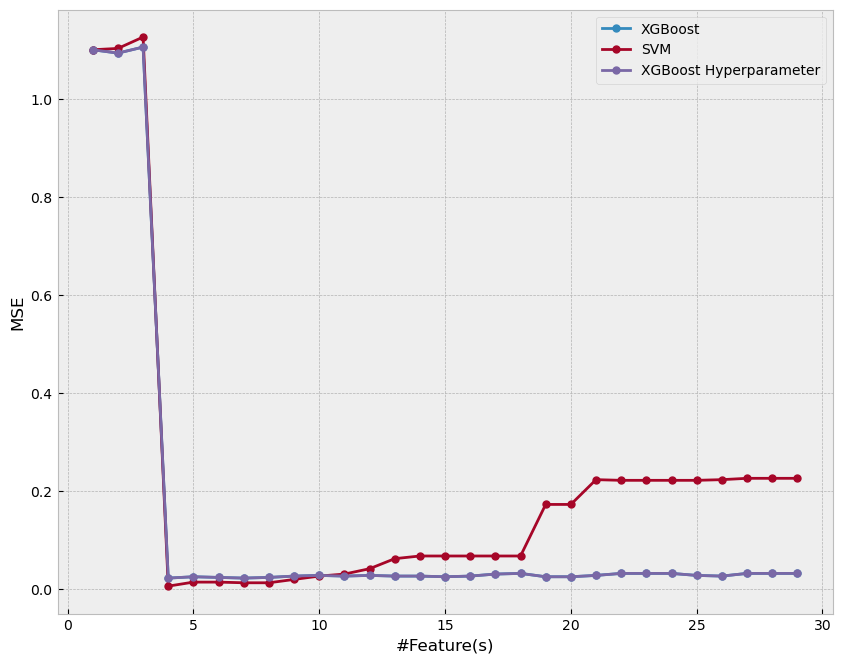

In [144]:
plt.subplots(figsize=(10,8), dpi=100)
plt.plot(comp_table["featureNum"], comp_table["MSE_xgb"], label = "XGBoost", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"], comp_table["MSE_svm"], label = "SVM", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"], comp_table["MSE_xgb_hyp"], label = "XGBoost Hyperparameter", marker = ".", markersize = 10)

plt.xlabel("#Feature(s)")
plt.ylabel("MSE")
plt.legend()
plt.show()

# Plot MAE Comparation

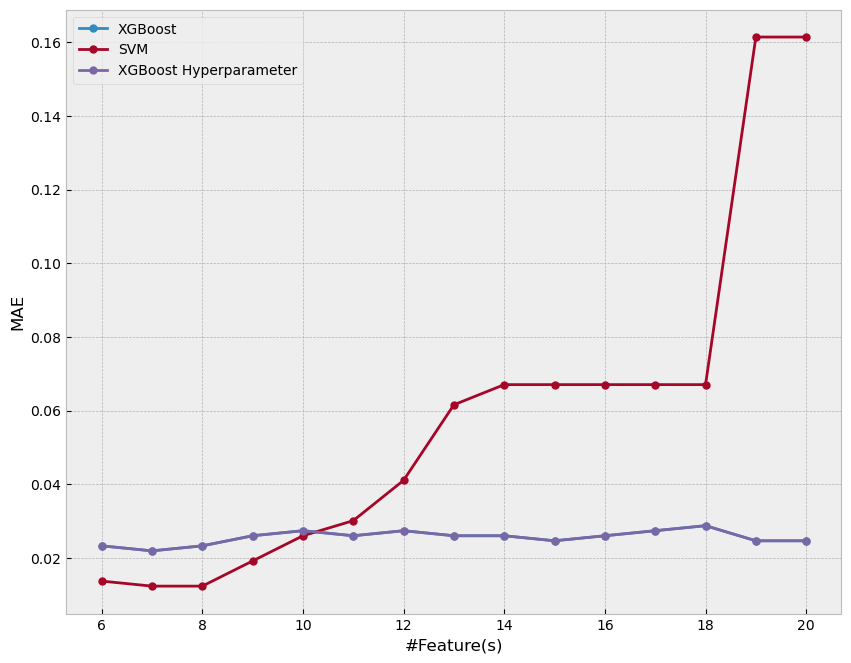

In [152]:
plt.subplots(figsize=(10,8), dpi=100)
plt.plot(comp_table["featureNum"][5:20], comp_table["MAE_xgb"][5:20], label = "XGBoost", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"][5:20], comp_table["MAE_svm"][5:20], label = "SVM", marker = ".", markersize = 10)
plt.plot(comp_table["featureNum"][5:20], comp_table["MAE_xgb_hyp"][5:20], label = "XGBoost Hyperparameter", marker = ".", markersize = 10)

plt.xlabel("#Feature(s)")
plt.ylabel("MAE")
plt.legend()
plt.show()